### 데이터 전처리

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

cust_df = pd.read_csv("./train_santander.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [4]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
cust_df['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64

In [6]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

In [7]:
# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [9]:
# X_train, y_train을 다시 학습과 검증 데이터 세트로 분리. 
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.3, random_state=0)

In [10]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, learning_rate 0.05, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.83603	validation_1-auc:0.80978
[1]	validation_0-auc:0.83783	validation_1-auc:0.81126
[2]	validation_0-auc:0.83892	validation_1-auc:0.81192
[3]	validation_0-auc:0.84090	validation_1-auc:0.81349
[4]	validation_0-auc:0.84187	validation_1-auc:0.81356
[5]	validation_0-auc:0.84355	validation_1-auc:0.81422
[6]	validation_0-auc:0.84534	validation_1-auc:0.81550
[7]	validation_0-auc:0.84658	validation_1-auc:0.81623
[8]	validation_0-auc:0.84727	validation_1-auc:0.81669
[9]	validation_0-auc:0.84794	validation_1-auc:0.81668
[10]	validation_0-auc:0.84980	validation_1-auc:0.81828
[11]	validation_0-auc:0.85105	validation_1-auc:0.81965
[12]	validation_0-auc:0.85217	validation_1-auc:0.81999
[13]	validation_0-auc:0.85301	validation_1-auc:0.82049
[14]	validation_0-auc:0.85558	validation_1-auc:0.82210
[15]	validation_0-auc:0.85662	validation_1-auc:0.82288
[16]	validation_0-auc:0.85811	validation_1-auc:0.82380
[17]	validation_0-auc:0.85864	validation_1-auc:0.82365
[18]	validation_0-au

[148]	validation_0-auc:0.90375	validation_1-auc:0.83346
[149]	validation_0-auc:0.90377	validation_1-auc:0.83346
[150]	validation_0-auc:0.90383	validation_1-auc:0.83338
[151]	validation_0-auc:0.90397	validation_1-auc:0.83334
[152]	validation_0-auc:0.90402	validation_1-auc:0.83337
[153]	validation_0-auc:0.90404	validation_1-auc:0.83333
[154]	validation_0-auc:0.90419	validation_1-auc:0.83327
[155]	validation_0-auc:0.90455	validation_1-auc:0.83326
[156]	validation_0-auc:0.90477	validation_1-auc:0.83323
[157]	validation_0-auc:0.90485	validation_1-auc:0.83327
[158]	validation_0-auc:0.90513	validation_1-auc:0.83334
[159]	validation_0-auc:0.90534	validation_1-auc:0.83340
[160]	validation_0-auc:0.90545	validation_1-auc:0.83336
[161]	validation_0-auc:0.90552	validation_1-auc:0.83330
[162]	validation_0-auc:0.90557	validation_1-auc:0.83320
[163]	validation_0-auc:0.90561	validation_1-auc:0.83325
[164]	validation_0-auc:0.90573	validation_1-auc:0.83324
[165]	validation_0-auc:0.90581	validation_1-auc:

In [11]:
from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색. 

xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# 목적 함수 설정. 
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.  
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            colsample_bytree=search_space['colsample_bytree'],
                            learning_rate=search_space['learning_rate']
                           )
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc',
                   eval_set=[(X_tr, y_tr), (X_val, y_val)])
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
        
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
    return -1 * np.mean(roc_auc_list)

In [16]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func, space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[0]	validation_0-auc:0.76925	validation_1-auc:0.73368                                                                  
[1]	validation_0-auc:0.77931	validation_1-auc:0.74099                                                                  
[2]	validation_0-auc:0.78206	validation_1-auc:0.74516                                                                  
[3]	validation_0-auc:0.82632	validation_1-auc:0.79329                                                                  
[4]	validation_0-auc:0.82410	validation_1-auc:0.79134                                                                  
[5]	validation_0-auc:0.83679	validation_1-auc:0.80348                                                                  
[6]	validation_0-auc:0.84272	validation_1-auc:0.80982                                                                  
[7]	validation_0-auc:0.84774	validation_1-auc:0.81687                                                                  
[8]	validation_0-auc:0.84653	validation_

[2]	validation_0-auc:0.78379	validation_1-auc:0.74875                                                                  
[3]	validation_0-auc:0.82915	validation_1-auc:0.79699                                                                  
[4]	validation_0-auc:0.82930	validation_1-auc:0.79394                                                                  
[5]	validation_0-auc:0.84020	validation_1-auc:0.80805                                                                  
[6]	validation_0-auc:0.84502	validation_1-auc:0.81382                                                                  
[7]	validation_0-auc:0.84943	validation_1-auc:0.81869                                                                  
[8]	validation_0-auc:0.84924	validation_1-auc:0.81616                                                                  
[9]	validation_0-auc:0.85312	validation_1-auc:0.82108                                                                  
[10]	validation_0-auc:0.85400	validation

[70]	validation_0-auc:0.89761	validation_1-auc:0.83636                                                                 
[71]	validation_0-auc:0.89787	validation_1-auc:0.83633                                                                 
[72]	validation_0-auc:0.89815	validation_1-auc:0.83629                                                                 
[73]	validation_0-auc:0.89841	validation_1-auc:0.83617                                                                 
[74]	validation_0-auc:0.89866	validation_1-auc:0.83619                                                                 
[75]	validation_0-auc:0.89878	validation_1-auc:0.83624                                                                 
[76]	validation_0-auc:0.89894	validation_1-auc:0.83634                                                                 
[77]	validation_0-auc:0.89913	validation_1-auc:0.83630                                                                 
[78]	validation_0-auc:0.89951	validation

[43]	validation_0-auc:0.88605	validation_1-auc:0.83629                                                                 
[44]	validation_0-auc:0.88661	validation_1-auc:0.83658                                                                 
[45]	validation_0-auc:0.88714	validation_1-auc:0.83675                                                                 
[46]	validation_0-auc:0.88757	validation_1-auc:0.83687                                                                 
[47]	validation_0-auc:0.88802	validation_1-auc:0.83697                                                                 
[48]	validation_0-auc:0.88836	validation_1-auc:0.83676                                                                 
[49]	validation_0-auc:0.88949	validation_1-auc:0.83711                                                                 
[50]	validation_0-auc:0.88988	validation_1-auc:0.83726                                                                 
[51]	validation_0-auc:0.89043	validation

[11]	validation_0-auc:0.87919	validation_1-auc:0.81238                                                                 
[12]	validation_0-auc:0.87876	validation_1-auc:0.81092                                                                 
[13]	validation_0-auc:0.87922	validation_1-auc:0.81008                                                                 
[14]	validation_0-auc:0.87876	validation_1-auc:0.81048                                                                 
[15]	validation_0-auc:0.87747	validation_1-auc:0.80863                                                                 
[16]	validation_0-auc:0.87799	validation_1-auc:0.80801                                                                 
[17]	validation_0-auc:0.87786	validation_1-auc:0.80719                                                                 
[18]	validation_0-auc:0.88167	validation_1-auc:0.81133                                                                 
[19]	validation_0-auc:0.88478	validation

[79]	validation_0-auc:0.91981	validation_1-auc:0.83278                                                                 
[80]	validation_0-auc:0.91998	validation_1-auc:0.83278                                                                 
[81]	validation_0-auc:0.92029	validation_1-auc:0.83281                                                                 
[82]	validation_0-auc:0.92037	validation_1-auc:0.83272                                                                 
[83]	validation_0-auc:0.92065	validation_1-auc:0.83289                                                                 
[84]	validation_0-auc:0.92081	validation_1-auc:0.83275                                                                 
[85]	validation_0-auc:0.92093	validation_1-auc:0.83275                                                                 
[86]	validation_0-auc:0.92099	validation_1-auc:0.83274                                                                 
[87]	validation_0-auc:0.92103	validation

[47]	validation_0-auc:0.91202	validation_1-auc:0.83052                                                                 
[48]	validation_0-auc:0.91224	validation_1-auc:0.83044                                                                 
[49]	validation_0-auc:0.91293	validation_1-auc:0.83092                                                                 
[50]	validation_0-auc:0.91335	validation_1-auc:0.83140                                                                 
[51]	validation_0-auc:0.91393	validation_1-auc:0.83102                                                                 
[52]	validation_0-auc:0.91410	validation_1-auc:0.83048                                                                 
[53]	validation_0-auc:0.91442	validation_1-auc:0.83108                                                                 
[54]	validation_0-auc:0.91473	validation_1-auc:0.83078                                                                 
[55]	validation_0-auc:0.91519	validation

[15]	validation_0-auc:0.87680	validation_1-auc:0.80988                                                                 
[16]	validation_0-auc:0.87747	validation_1-auc:0.80882                                                                 
[17]	validation_0-auc:0.87688	validation_1-auc:0.80789                                                                 
[18]	validation_0-auc:0.88060	validation_1-auc:0.81208                                                                 
[19]	validation_0-auc:0.88367	validation_1-auc:0.81454                                                                 
[20]	validation_0-auc:0.88620	validation_1-auc:0.81734                                                                 
[21]	validation_0-auc:0.88581	validation_1-auc:0.81620                                                                 
[22]	validation_0-auc:0.88614	validation_1-auc:0.81545                                                                 
[23]	validation_0-auc:0.88654	validation

[83]	validation_0-auc:0.92197	validation_1-auc:0.83256                                                                 
[84]	validation_0-auc:0.92228	validation_1-auc:0.83247                                                                 
[85]	validation_0-auc:0.92252	validation_1-auc:0.83232                                                                 
[86]	validation_0-auc:0.92266	validation_1-auc:0.83225                                                                 
[87]	validation_0-auc:0.92274	validation_1-auc:0.83212                                                                 
[88]	validation_0-auc:0.92296	validation_1-auc:0.83200                                                                 
[89]	validation_0-auc:0.92317	validation_1-auc:0.83226                                                                 
[90]	validation_0-auc:0.92330	validation_1-auc:0.83203                                                                 
[91]	validation_0-auc:0.92342	validation

[51]	validation_0-auc:0.93968	validation_1-auc:0.82351                                                                 
[52]	validation_0-auc:0.93994	validation_1-auc:0.82346                                                                 
[53]	validation_0-auc:0.93999	validation_1-auc:0.82346                                                                 
[54]	validation_0-auc:0.94056	validation_1-auc:0.82348                                                                 
[55]	validation_0-auc:0.94079	validation_1-auc:0.82313                                                                 
[56]	validation_0-auc:0.94121	validation_1-auc:0.82264                                                                 
[57]	validation_0-auc:0.94121	validation_1-auc:0.82247                                                                 
[58]	validation_0-auc:0.94131	validation_1-auc:0.82233                                                                 
[59]	validation_0-auc:0.94163	validation

[51]	validation_0-auc:0.94281	validation_1-auc:0.83196                                                                 
[52]	validation_0-auc:0.94290	validation_1-auc:0.83201                                                                 
[53]	validation_0-auc:0.94348	validation_1-auc:0.83209                                                                 
[54]	validation_0-auc:0.94352	validation_1-auc:0.83191                                                                 
[55]	validation_0-auc:0.94363	validation_1-auc:0.83181                                                                 
[56]	validation_0-auc:0.94371	validation_1-auc:0.83174                                                                 
[57]	validation_0-auc:0.94393	validation_1-auc:0.83147                                                                 
[58]	validation_0-auc:0.94399	validation_1-auc:0.83138                                                                 
[59]	validation_0-auc:0.94408	validation

[42]	validation_0-auc:0.93904	validation_1-auc:0.82952                                                                 
[43]	validation_0-auc:0.94026	validation_1-auc:0.82923                                                                 
[44]	validation_0-auc:0.94058	validation_1-auc:0.82932                                                                 
[45]	validation_0-auc:0.94099	validation_1-auc:0.82893                                                                 
[46]	validation_0-auc:0.94144	validation_1-auc:0.82887                                                                 
[47]	validation_0-auc:0.94157	validation_1-auc:0.82882                                                                 
[48]	validation_0-auc:0.94167	validation_1-auc:0.82882                                                                 
[49]	validation_0-auc:0.94208	validation_1-auc:0.82904                                                                 
[50]	validation_0-auc:0.94238	validation

[38]	validation_0-auc:0.90566	validation_1-auc:0.82524                                                                 
[39]	validation_0-auc:0.90578	validation_1-auc:0.82485                                                                 
[40]	validation_0-auc:0.90660	validation_1-auc:0.82545                                                                 
[41]	validation_0-auc:0.90725	validation_1-auc:0.82595                                                                 
[42]	validation_0-auc:0.90805	validation_1-auc:0.82643                                                                 
[43]	validation_0-auc:0.90887	validation_1-auc:0.82683                                                                 
[44]	validation_0-auc:0.90984	validation_1-auc:0.82694                                                                 
[45]	validation_0-auc:0.91021	validation_1-auc:0.82740                                                                 
[46]	validation_0-auc:0.91055	validation

[6]	validation_0-auc:0.87501	validation_1-auc:0.81518                                                                  
[7]	validation_0-auc:0.87188	validation_1-auc:0.81104                                                                  
[8]	validation_0-auc:0.87272	validation_1-auc:0.80744                                                                  
[9]	validation_0-auc:0.87961	validation_1-auc:0.81382                                                                  
[10]	validation_0-auc:0.87835	validation_1-auc:0.81136                                                                 
[11]	validation_0-auc:0.88235	validation_1-auc:0.81527                                                                 
[12]	validation_0-auc:0.88081	validation_1-auc:0.81315                                                                 
[13]	validation_0-auc:0.88089	validation_1-auc:0.81285                                                                 
[14]	validation_0-auc:0.88030	validation

[74]	validation_0-auc:0.92375	validation_1-auc:0.83169                                                                 
[75]	validation_0-auc:0.92412	validation_1-auc:0.83153                                                                 
[76]	validation_0-auc:0.92447	validation_1-auc:0.83132                                                                 
[77]	validation_0-auc:0.92469	validation_1-auc:0.83155                                                                 
[78]	validation_0-auc:0.92509	validation_1-auc:0.83126                                                                 
[79]	validation_0-auc:0.92540	validation_1-auc:0.83096                                                                 
[80]	validation_0-auc:0.92571	validation_1-auc:0.83143                                                                 
[81]	validation_0-auc:0.92604	validation_1-auc:0.83167                                                                 
[82]	validation_0-auc:0.92606	validation

[42]	validation_0-auc:0.90972	validation_1-auc:0.82756                                                                 
[43]	validation_0-auc:0.91013	validation_1-auc:0.82810                                                                 
[44]	validation_0-auc:0.91086	validation_1-auc:0.82865                                                                 
[45]	validation_0-auc:0.91122	validation_1-auc:0.82889                                                                 
[46]	validation_0-auc:0.91165	validation_1-auc:0.82889                                                                 
[47]	validation_0-auc:0.91223	validation_1-auc:0.82843                                                                 
[48]	validation_0-auc:0.91239	validation_1-auc:0.82858                                                                 
[49]	validation_0-auc:0.91291	validation_1-auc:0.82904                                                                 
[50]	validation_0-auc:0.91321	validation

[10]	validation_0-auc:0.91210	validation_1-auc:0.81360                                                                 
[11]	validation_0-auc:0.91708	validation_1-auc:0.81754                                                                 
[12]	validation_0-auc:0.91764	validation_1-auc:0.81488                                                                 
[13]	validation_0-auc:0.91848	validation_1-auc:0.81357                                                                 
[14]	validation_0-auc:0.92298	validation_1-auc:0.81806                                                                 
[15]	validation_0-auc:0.92668	validation_1-auc:0.81991                                                                 
[16]	validation_0-auc:0.92935	validation_1-auc:0.82197                                                                 
[17]	validation_0-auc:0.93069	validation_1-auc:0.82172                                                                 
[18]	validation_0-auc:0.93165	validation

[26]	validation_0-auc:0.94369	validation_1-auc:0.82535                                                                 
[27]	validation_0-auc:0.94473	validation_1-auc:0.82525                                                                 
[28]	validation_0-auc:0.94525	validation_1-auc:0.82509                                                                 
[29]	validation_0-auc:0.94579	validation_1-auc:0.82527                                                                 
[30]	validation_0-auc:0.94633	validation_1-auc:0.82531                                                                 
[31]	validation_0-auc:0.94666	validation_1-auc:0.82625                                                                 
[32]	validation_0-auc:0.94690	validation_1-auc:0.82689                                                                 
[33]	validation_0-auc:0.94744	validation_1-auc:0.82662                                                                 
[34]	validation_0-auc:0.94792	validation

[14]	validation_0-auc:0.92626	validation_1-auc:0.81931                                                                 
[15]	validation_0-auc:0.92863	validation_1-auc:0.82022                                                                 
[16]	validation_0-auc:0.93020	validation_1-auc:0.82214                                                                 
[17]	validation_0-auc:0.93100	validation_1-auc:0.82187                                                                 
[18]	validation_0-auc:0.93198	validation_1-auc:0.82306                                                                 
[19]	validation_0-auc:0.93376	validation_1-auc:0.82310                                                                 
[20]	validation_0-auc:0.93534	validation_1-auc:0.82363                                                                 
[21]	validation_0-auc:0.93606	validation_1-auc:0.82276                                                                 
[22]	validation_0-auc:0.93743	validation

[11]	validation_0-auc:0.86209	validation_1-auc:0.81999                                                                 
[12]	validation_0-auc:0.86089	validation_1-auc:0.81807                                                                 
[13]	validation_0-auc:0.86093	validation_1-auc:0.81534                                                                 
[14]	validation_0-auc:0.86459	validation_1-auc:0.81988                                                                 
[15]	validation_0-auc:0.86426	validation_1-auc:0.81780                                                                 
[16]	validation_0-auc:0.86699	validation_1-auc:0.82137                                                                 
[17]	validation_0-auc:0.86684	validation_1-auc:0.81906                                                                 
[18]	validation_0-auc:0.86886	validation_1-auc:0.82286                                                                 
[19]	validation_0-auc:0.87123	validation

[0]	validation_0-auc:0.77819	validation_1-auc:0.74309                                                                  
[1]	validation_0-auc:0.78206	validation_1-auc:0.74621                                                                  
[2]	validation_0-auc:0.78832	validation_1-auc:0.74992                                                                  
[3]	validation_0-auc:0.83533	validation_1-auc:0.80140                                                                  
[4]	validation_0-auc:0.83506	validation_1-auc:0.79781                                                                  
[5]	validation_0-auc:0.84617	validation_1-auc:0.80910                                                                  
[6]	validation_0-auc:0.85179	validation_1-auc:0.81415                                                                  
[7]	validation_0-auc:0.85565	validation_1-auc:0.81901                                                                  
[8]	validation_0-auc:0.85748	validation_

[68]	validation_0-auc:0.90116	validation_1-auc:0.83675                                                                 
[69]	validation_0-auc:0.90134	validation_1-auc:0.83660                                                                 
[70]	validation_0-auc:0.90168	validation_1-auc:0.83664                                                                 
[71]	validation_0-auc:0.90189	validation_1-auc:0.83649                                                                 
[72]	validation_0-auc:0.90217	validation_1-auc:0.83668                                                                 
[73]	validation_0-auc:0.90229	validation_1-auc:0.83667                                                                 
[74]	validation_0-auc:0.90254	validation_1-auc:0.83650                                                                 
[75]	validation_0-auc:0.90277	validation_1-auc:0.83647                                                                 
[76]	validation_0-auc:0.90346	validation

[37]	validation_0-auc:0.89009	validation_1-auc:0.83588                                                                 
[38]	validation_0-auc:0.89092	validation_1-auc:0.83582                                                                 
[39]	validation_0-auc:0.89138	validation_1-auc:0.83571                                                                 
[40]	validation_0-auc:0.89251	validation_1-auc:0.83607                                                                 
[41]	validation_0-auc:0.89279	validation_1-auc:0.83636                                                                 
[42]	validation_0-auc:0.89312	validation_1-auc:0.83701                                                                 
[43]	validation_0-auc:0.89336	validation_1-auc:0.83696                                                                 
[44]	validation_0-auc:0.89395	validation_1-auc:0.83709                                                                 
[45]	validation_0-auc:0.89415	validation

[19]	validation_0-auc:0.87537	validation_1-auc:0.82205                                                                 
[20]	validation_0-auc:0.87854	validation_1-auc:0.82544                                                                 
[21]	validation_0-auc:0.87894	validation_1-auc:0.82436                                                                 
[22]	validation_0-auc:0.88171	validation_1-auc:0.82684                                                                 
[23]	validation_0-auc:0.88186	validation_1-auc:0.82589                                                                 
[24]	validation_0-auc:0.88406	validation_1-auc:0.82773                                                                 
[25]	validation_0-auc:0.88566	validation_1-auc:0.82927                                                                 
[26]	validation_0-auc:0.88689	validation_1-auc:0.83005                                                                 
[27]	validation_0-auc:0.88828	validation

[16]	validation_0-auc:0.86993	validation_1-auc:0.81837                                                                 
[17]	validation_0-auc:0.87041	validation_1-auc:0.81700                                                                 
[18]	validation_0-auc:0.87400	validation_1-auc:0.82075                                                                 
[19]	validation_0-auc:0.87741	validation_1-auc:0.82438                                                                 
[20]	validation_0-auc:0.88062	validation_1-auc:0.82736                                                                 
[21]	validation_0-auc:0.88025	validation_1-auc:0.82686                                                                 
[22]	validation_0-auc:0.88341	validation_1-auc:0.82846                                                                 
[23]	validation_0-auc:0.88448	validation_1-auc:0.82777                                                                 
[24]	validation_0-auc:0.88642	validation

[1]	validation_0-auc:0.79253	validation_1-auc:0.76423                                                                  
[2]	validation_0-auc:0.79544	validation_1-auc:0.76852                                                                  
[3]	validation_0-auc:0.84213	validation_1-auc:0.80523                                                                  
[4]	validation_0-auc:0.83848	validation_1-auc:0.79949                                                                  
[5]	validation_0-auc:0.85000	validation_1-auc:0.81229                                                                  
[6]	validation_0-auc:0.85618	validation_1-auc:0.81754                                                                  
[7]	validation_0-auc:0.85531	validation_1-auc:0.81575                                                                  
[8]	validation_0-auc:0.85662	validation_1-auc:0.81428                                                                  
[9]	validation_0-auc:0.86177	validation_

[69]	validation_0-auc:0.90993	validation_1-auc:0.83624                                                                 
[70]	validation_0-auc:0.91022	validation_1-auc:0.83638                                                                 
[71]	validation_0-auc:0.91054	validation_1-auc:0.83640                                                                 
[72]	validation_0-auc:0.91071	validation_1-auc:0.83638                                                                 
[0]	validation_0-auc:0.81577	validation_1-auc:0.72977                                                                  
[1]	validation_0-auc:0.82487	validation_1-auc:0.73981                                                                  
[2]	validation_0-auc:0.83058	validation_1-auc:0.74455                                                                  
[3]	validation_0-auc:0.87193	validation_1-auc:0.78649                                                                  
[4]	validation_0-auc:0.86943	validation_

[64]	validation_0-auc:0.93594	validation_1-auc:0.82885                                                                 
[65]	validation_0-auc:0.93613	validation_1-auc:0.82883                                                                 
[66]	validation_0-auc:0.93625	validation_1-auc:0.82876                                                                 
[67]	validation_0-auc:0.93638	validation_1-auc:0.82861                                                                 
[68]	validation_0-auc:0.93676	validation_1-auc:0.82877                                                                 
[69]	validation_0-auc:0.93692	validation_1-auc:0.82873                                                                 
[70]	validation_0-auc:0.93720	validation_1-auc:0.82879                                                                 
[71]	validation_0-auc:0.93732	validation_1-auc:0.82875                                                                 
[72]	validation_0-auc:0.93752	validation

[56]	validation_0-auc:0.93536	validation_1-auc:0.83010                                                                 
[57]	validation_0-auc:0.93543	validation_1-auc:0.83017                                                                 
[58]	validation_0-auc:0.93577	validation_1-auc:0.83017                                                                 
[59]	validation_0-auc:0.93599	validation_1-auc:0.83042                                                                 
[60]	validation_0-auc:0.93615	validation_1-auc:0.83045                                                                 
[61]	validation_0-auc:0.93620	validation_1-auc:0.83083                                                                 
[62]	validation_0-auc:0.93633	validation_1-auc:0.83096                                                                 
[63]	validation_0-auc:0.93657	validation_1-auc:0.83097                                                                 
[64]	validation_0-auc:0.93675	validation

[24]	validation_0-auc:0.91519	validation_1-auc:0.82210                                                                 
[25]	validation_0-auc:0.91645	validation_1-auc:0.82259                                                                 
[26]	validation_0-auc:0.91755	validation_1-auc:0.82421                                                                 
[27]	validation_0-auc:0.91876	validation_1-auc:0.82487                                                                 
[28]	validation_0-auc:0.91916	validation_1-auc:0.82387                                                                 
[29]	validation_0-auc:0.91967	validation_1-auc:0.82356                                                                 
[30]	validation_0-auc:0.92001	validation_1-auc:0.82296                                                                 
[31]	validation_0-auc:0.92069	validation_1-auc:0.82360                                                                 
[32]	validation_0-auc:0.92172	validation

[92]	validation_0-auc:0.94242	validation_1-auc:0.82963                                                                 
[93]	validation_0-auc:0.94255	validation_1-auc:0.82967                                                                 
[94]	validation_0-auc:0.94291	validation_1-auc:0.82948                                                                 
[95]	validation_0-auc:0.94315	validation_1-auc:0.82952                                                                 
[96]	validation_0-auc:0.94323	validation_1-auc:0.82957                                                                 
[97]	validation_0-auc:0.94335	validation_1-auc:0.82958                                                                 
[98]	validation_0-auc:0.94352	validation_1-auc:0.82964                                                                 
[99]	validation_0-auc:0.94375	validation_1-auc:0.82964                                                                 
[0]	validation_0-auc:0.77063	validation_

[60]	validation_0-auc:0.89634	validation_1-auc:0.83140                                                                 
[61]	validation_0-auc:0.89642	validation_1-auc:0.83128                                                                 
[62]	validation_0-auc:0.89691	validation_1-auc:0.83123                                                                 
[63]	validation_0-auc:0.89742	validation_1-auc:0.83137                                                                 
[64]	validation_0-auc:0.89755	validation_1-auc:0.83102                                                                 
[65]	validation_0-auc:0.89790	validation_1-auc:0.83079                                                                 
[0]	validation_0-auc:0.77177	validation_1-auc:0.74252                                                                  
[1]	validation_0-auc:0.83816	validation_1-auc:0.81320                                                                  
[2]	validation_0-auc:0.83285	validation_

[62]	validation_0-auc:0.89707	validation_1-auc:0.83672                                                                 
[63]	validation_0-auc:0.89780	validation_1-auc:0.83652                                                                 
[64]	validation_0-auc:0.89802	validation_1-auc:0.83656                                                                 
[65]	validation_0-auc:0.89839	validation_1-auc:0.83640                                                                 
[66]	validation_0-auc:0.89851	validation_1-auc:0.83636                                                                 
[67]	validation_0-auc:0.89860	validation_1-auc:0.83628                                                                 
[68]	validation_0-auc:0.89908	validation_1-auc:0.83607                                                                 
[69]	validation_0-auc:0.89910	validation_1-auc:0.83612                                                                 
[70]	validation_0-auc:0.89922	validation

[50]	validation_0-auc:0.89627	validation_1-auc:0.83792                                                                 
[51]	validation_0-auc:0.89646	validation_1-auc:0.83805                                                                 
[52]	validation_0-auc:0.89719	validation_1-auc:0.83768                                                                 
[53]	validation_0-auc:0.89792	validation_1-auc:0.83756                                                                 
[54]	validation_0-auc:0.89820	validation_1-auc:0.83746                                                                 
[55]	validation_0-auc:0.89898	validation_1-auc:0.83728                                                                 
[56]	validation_0-auc:0.89942	validation_1-auc:0.83711                                                                 
[57]	validation_0-auc:0.89953	validation_1-auc:0.83711                                                                 
[58]	validation_0-auc:0.90019	validation

[47]	validation_0-auc:0.94824	validation_1-auc:0.82440                                                                 
[48]	validation_0-auc:0.94854	validation_1-auc:0.82404                                                                 
[49]	validation_0-auc:0.94893	validation_1-auc:0.82332                                                                 
[50]	validation_0-auc:0.94899	validation_1-auc:0.82334                                                                 
[51]	validation_0-auc:0.94945	validation_1-auc:0.82330                                                                 
[52]	validation_0-auc:0.94956	validation_1-auc:0.82279                                                                 
[53]	validation_0-auc:0.94983	validation_1-auc:0.82265                                                                 
[54]	validation_0-auc:0.95002	validation_1-auc:0.82237                                                                 
[55]	validation_0-auc:0.95008	validation

[52]	validation_0-auc:0.95034	validation_1-auc:0.82949                                                                 
[53]	validation_0-auc:0.95039	validation_1-auc:0.82927                                                                 
[54]	validation_0-auc:0.95086	validation_1-auc:0.82906                                                                 
[55]	validation_0-auc:0.95095	validation_1-auc:0.82897                                                                 
[56]	validation_0-auc:0.95107	validation_1-auc:0.82897                                                                 
[57]	validation_0-auc:0.95117	validation_1-auc:0.82877                                                                 
[58]	validation_0-auc:0.95133	validation_1-auc:0.82862                                                                 
[59]	validation_0-auc:0.95165	validation_1-auc:0.82837                                                                 
[60]	validation_0-auc:0.95198	validation

[48]	validation_0-auc:0.95105	validation_1-auc:0.82564                                                                 
[49]	validation_0-auc:0.95117	validation_1-auc:0.82562                                                                 
[50]	validation_0-auc:0.95148	validation_1-auc:0.82564                                                                 
[51]	validation_0-auc:0.95174	validation_1-auc:0.82539                                                                 
[52]	validation_0-auc:0.95206	validation_1-auc:0.82517                                                                 
[53]	validation_0-auc:0.95308	validation_1-auc:0.82476                                                                 
[54]	validation_0-auc:0.95311	validation_1-auc:0.82495                                                                 
[0]	validation_0-auc:0.81960	validation_1-auc:0.72050                                                                  
[1]	validation_0-auc:0.83046	validation_

[61]	validation_0-auc:0.92917	validation_1-auc:0.82324                                                                 
[62]	validation_0-auc:0.92939	validation_1-auc:0.82336                                                                 
[63]	validation_0-auc:0.92991	validation_1-auc:0.82374                                                                 
[64]	validation_0-auc:0.93017	validation_1-auc:0.82402                                                                 
[65]	validation_0-auc:0.93035	validation_1-auc:0.82373                                                                 
[66]	validation_0-auc:0.93079	validation_1-auc:0.82399                                                                 
[67]	validation_0-auc:0.93152	validation_1-auc:0.82404                                                                 
[68]	validation_0-auc:0.93213	validation_1-auc:0.82453                                                                 
[69]	validation_0-auc:0.93282	validation

[29]	validation_0-auc:0.91213	validation_1-auc:0.82150                                                                 
[30]	validation_0-auc:0.91224	validation_1-auc:0.82055                                                                 
[31]	validation_0-auc:0.91310	validation_1-auc:0.82132                                                                 
[32]	validation_0-auc:0.91451	validation_1-auc:0.82186                                                                 
[33]	validation_0-auc:0.91456	validation_1-auc:0.82103                                                                 
[34]	validation_0-auc:0.91625	validation_1-auc:0.82164                                                                 
[35]	validation_0-auc:0.91714	validation_1-auc:0.82225                                                                 
[36]	validation_0-auc:0.91788	validation_1-auc:0.82260                                                                 
[37]	validation_0-auc:0.91846	validation

[97]	validation_0-auc:0.94495	validation_1-auc:0.82783                                                                 
[98]	validation_0-auc:0.94540	validation_1-auc:0.82772                                                                 
[99]	validation_0-auc:0.94563	validation_1-auc:0.82781                                                                 
[0]	validation_0-auc:0.82486	validation_1-auc:0.73686                                                                  
[1]	validation_0-auc:0.84324	validation_1-auc:0.75207                                                                  
[2]	validation_0-auc:0.84590	validation_1-auc:0.75617                                                                  
[3]	validation_0-auc:0.88103	validation_1-auc:0.78859                                                                  
[4]	validation_0-auc:0.87768	validation_1-auc:0.78726                                                                  
[5]	validation_0-auc:0.88815	validation_

[65]	validation_0-auc:0.93189	validation_1-auc:0.82340                                                                 
[66]	validation_0-auc:0.93225	validation_1-auc:0.82363                                                                 
[67]	validation_0-auc:0.93284	validation_1-auc:0.82381                                                                 
[68]	validation_0-auc:0.93353	validation_1-auc:0.82392                                                                 
[69]	validation_0-auc:0.93412	validation_1-auc:0.82402                                                                 
[70]	validation_0-auc:0.93476	validation_1-auc:0.82447                                                                 
[71]	validation_0-auc:0.93519	validation_1-auc:0.82477                                                                 
[72]	validation_0-auc:0.93565	validation_1-auc:0.82446                                                                 
[73]	validation_0-auc:0.93587	validation

[33]	validation_0-auc:0.95695	validation_1-auc:0.81906                                                                 
[34]	validation_0-auc:0.95720	validation_1-auc:0.81880                                                                 
[35]	validation_0-auc:0.95788	validation_1-auc:0.81864                                                                 
[36]	validation_0-auc:0.95819	validation_1-auc:0.81873                                                                 
[37]	validation_0-auc:0.95861	validation_1-auc:0.81862                                                                 
[38]	validation_0-auc:0.95881	validation_1-auc:0.81837                                                                 
[39]	validation_0-auc:0.95928	validation_1-auc:0.81835                                                                 
[40]	validation_0-auc:0.95959	validation_1-auc:0.81802                                                                 
[41]	validation_0-auc:0.95982	validation

[55]	validation_0-auc:0.96650	validation_1-auc:0.82202                                                                 
[56]	validation_0-auc:0.96658	validation_1-auc:0.82206                                                                 
[57]	validation_0-auc:0.96665	validation_1-auc:0.82195                                                                 
[58]	validation_0-auc:0.96676	validation_1-auc:0.82205                                                                 
[59]	validation_0-auc:0.96694	validation_1-auc:0.82199                                                                 
[60]	validation_0-auc:0.96702	validation_1-auc:0.82168                                                                 
[61]	validation_0-auc:0.96706	validation_1-auc:0.82154                                                                 
[62]	validation_0-auc:0.96720	validation_1-auc:0.82143                                                                 
[63]	validation_0-auc:0.96727	validation

[58]	validation_0-auc:0.96507	validation_1-auc:0.82164                                                                 
[59]	validation_0-auc:0.96520	validation_1-auc:0.82189                                                                 
[60]	validation_0-auc:0.96527	validation_1-auc:0.82163                                                                 
[61]	validation_0-auc:0.96609	validation_1-auc:0.82155                                                                 
[62]	validation_0-auc:0.96643	validation_1-auc:0.82125                                                                 
[63]	validation_0-auc:0.96647	validation_1-auc:0.82111                                                                 
[64]	validation_0-auc:0.96657	validation_1-auc:0.82084                                                                 
[65]	validation_0-auc:0.96667	validation_1-auc:0.82039                                                                 
[66]	validation_0-auc:0.96672	validation

[55]	validation_0-auc:0.88407	validation_1-auc:0.83047                                                                 
[56]	validation_0-auc:0.88432	validation_1-auc:0.83006                                                                 
[57]	validation_0-auc:0.88478	validation_1-auc:0.83007                                                                 
[58]	validation_0-auc:0.88488	validation_1-auc:0.83005                                                                 
[59]	validation_0-auc:0.88499	validation_1-auc:0.82994                                                                 
[60]	validation_0-auc:0.88580	validation_1-auc:0.83013                                                                 
[61]	validation_0-auc:0.88578	validation_1-auc:0.82993                                                                 
[62]	validation_0-auc:0.88627	validation_1-auc:0.83007                                                                 
[63]	validation_0-auc:0.88658	validation

[23]	validation_0-auc:0.86754	validation_1-auc:0.81988                                                                 
[24]	validation_0-auc:0.86925	validation_1-auc:0.82191                                                                 
[25]	validation_0-auc:0.87055	validation_1-auc:0.82293                                                                 
[26]	validation_0-auc:0.87170	validation_1-auc:0.82386                                                                 
[27]	validation_0-auc:0.87283	validation_1-auc:0.82485                                                                 
[28]	validation_0-auc:0.87267	validation_1-auc:0.82394                                                                 
[29]	validation_0-auc:0.87247	validation_1-auc:0.82348                                                                 
[30]	validation_0-auc:0.87233	validation_1-auc:0.82291                                                                 
[31]	validation_0-auc:0.87292	validation

[91]	validation_0-auc:0.89846	validation_1-auc:0.83481                                                                 
[92]	validation_0-auc:0.89875	validation_1-auc:0.83487                                                                 
[93]	validation_0-auc:0.89900	validation_1-auc:0.83496                                                                 
[94]	validation_0-auc:0.89926	validation_1-auc:0.83492                                                                 
[95]	validation_0-auc:0.89965	validation_1-auc:0.83482                                                                 
[96]	validation_0-auc:0.89983	validation_1-auc:0.83507                                                                 
[97]	validation_0-auc:0.90015	validation_1-auc:0.83522                                                                 
[98]	validation_0-auc:0.90052	validation_1-auc:0.83525                                                                 
[99]	validation_0-auc:0.90067	validation

[59]	validation_0-auc:0.88685	validation_1-auc:0.82928                                                                 
[60]	validation_0-auc:0.88781	validation_1-auc:0.82980                                                                 
[61]	validation_0-auc:0.88777	validation_1-auc:0.82954                                                                 
[62]	validation_0-auc:0.88840	validation_1-auc:0.83003                                                                 
[63]	validation_0-auc:0.88867	validation_1-auc:0.83052                                                                 
[64]	validation_0-auc:0.88903	validation_1-auc:0.83091                                                                 
[65]	validation_0-auc:0.88940	validation_1-auc:0.83069                                                                 
[66]	validation_0-auc:0.88980	validation_1-auc:0.83109                                                                 
[67]	validation_0-auc:0.89044	validation

[27]	validation_0-auc:0.90389	validation_1-auc:0.82945                                                                 
[28]	validation_0-auc:0.90414	validation_1-auc:0.82941                                                                 
[29]	validation_0-auc:0.90490	validation_1-auc:0.82963                                                                 
[30]	validation_0-auc:0.90544	validation_1-auc:0.83024                                                                 
[31]	validation_0-auc:0.90606	validation_1-auc:0.83017                                                                 
[32]	validation_0-auc:0.90694	validation_1-auc:0.82994                                                                 
[33]	validation_0-auc:0.90775	validation_1-auc:0.82978                                                                 
[34]	validation_0-auc:0.90906	validation_1-auc:0.82945                                                                 
[35]	validation_0-auc:0.91003	validation

[35]	validation_0-auc:0.91124	validation_1-auc:0.83051                                                                 
[36]	validation_0-auc:0.91188	validation_1-auc:0.83035                                                                 
[37]	validation_0-auc:0.91271	validation_1-auc:0.83057                                                                 
[38]	validation_0-auc:0.91365	validation_1-auc:0.83100                                                                 
[39]	validation_0-auc:0.91407	validation_1-auc:0.83098                                                                 
[40]	validation_0-auc:0.91516	validation_1-auc:0.83114                                                                 
[41]	validation_0-auc:0.91618	validation_1-auc:0.83101                                                                 
[42]	validation_0-auc:0.91708	validation_1-auc:0.83071                                                                 
[43]	validation_0-auc:0.91760	validation

[3]	validation_0-auc:0.87313	validation_1-auc:0.80967                                                                  
[4]	validation_0-auc:0.86971	validation_1-auc:0.80806                                                                  
[5]	validation_0-auc:0.87606	validation_1-auc:0.81583                                                                  
[6]	validation_0-auc:0.88051	validation_1-auc:0.81797                                                                  
[7]	validation_0-auc:0.88269	validation_1-auc:0.82001                                                                  
[8]	validation_0-auc:0.88238	validation_1-auc:0.81816                                                                  
[9]	validation_0-auc:0.88424	validation_1-auc:0.81908                                                                  
[10]	validation_0-auc:0.88609	validation_1-auc:0.81955                                                                 
[11]	validation_0-auc:0.88808	validation

[71]	validation_0-auc:0.93310	validation_1-auc:0.83189                                                                 
[72]	validation_0-auc:0.93345	validation_1-auc:0.83194                                                                 
[73]	validation_0-auc:0.93388	validation_1-auc:0.83182                                                                 
[74]	validation_0-auc:0.93414	validation_1-auc:0.83181                                                                 
[75]	validation_0-auc:0.93448	validation_1-auc:0.83181                                                                 
[76]	validation_0-auc:0.93474	validation_1-auc:0.83172                                                                 
[77]	validation_0-auc:0.93498	validation_1-auc:0.83173                                                                 
[78]	validation_0-auc:0.93515	validation_1-auc:0.83168                                                                 
[79]	validation_0-auc:0.93542	validation

[39]	validation_0-auc:0.87440	validation_1-auc:0.83458                                                                 
[40]	validation_0-auc:0.87510	validation_1-auc:0.83474                                                                 
[41]	validation_0-auc:0.87550	validation_1-auc:0.83513                                                                 
[42]	validation_0-auc:0.87627	validation_1-auc:0.83496                                                                 
[43]	validation_0-auc:0.87673	validation_1-auc:0.83524                                                                 
[44]	validation_0-auc:0.87742	validation_1-auc:0.83497                                                                 
[45]	validation_0-auc:0.87779	validation_1-auc:0.83514                                                                 
[46]	validation_0-auc:0.87827	validation_1-auc:0.83504                                                                 
[47]	validation_0-auc:0.87863	validation

[7]	validation_0-auc:0.84664	validation_1-auc:0.81940                                                                  
[8]	validation_0-auc:0.84686	validation_1-auc:0.81680                                                                  
[9]	validation_0-auc:0.84966	validation_1-auc:0.82047                                                                  
[10]	validation_0-auc:0.85074	validation_1-auc:0.81879                                                                 
[11]	validation_0-auc:0.85375	validation_1-auc:0.82281                                                                 
[12]	validation_0-auc:0.85226	validation_1-auc:0.82066                                                                 
[13]	validation_0-auc:0.85194	validation_1-auc:0.81857                                                                 
[14]	validation_0-auc:0.85504	validation_1-auc:0.82175                                                                 
[15]	validation_0-auc:0.85352	validation

[75]	validation_0-auc:0.88687	validation_1-auc:0.83684                                                                 
[76]	validation_0-auc:0.88699	validation_1-auc:0.83683                                                                 
[77]	validation_0-auc:0.88712	validation_1-auc:0.83688                                                                 
[78]	validation_0-auc:0.88757	validation_1-auc:0.83683                                                                 
[79]	validation_0-auc:0.88764	validation_1-auc:0.83674                                                                 
[80]	validation_0-auc:0.88781	validation_1-auc:0.83678                                                                 
[81]	validation_0-auc:0.88804	validation_1-auc:0.83666                                                                 
[82]	validation_0-auc:0.88839	validation_1-auc:0.83668                                                                 
[83]	validation_0-auc:0.88851	validation

[43]	validation_0-auc:0.87616	validation_1-auc:0.83764                                                                 
[44]	validation_0-auc:0.87650	validation_1-auc:0.83786                                                                 
[45]	validation_0-auc:0.87697	validation_1-auc:0.83790                                                                 
[46]	validation_0-auc:0.87733	validation_1-auc:0.83788                                                                 
[47]	validation_0-auc:0.87782	validation_1-auc:0.83757                                                                 
[48]	validation_0-auc:0.87840	validation_1-auc:0.83762                                                                 
[49]	validation_0-auc:0.87881	validation_1-auc:0.83759                                                                 
[50]	validation_0-auc:0.87923	validation_1-auc:0.83770                                                                 
[51]	validation_0-auc:0.87971	validation

[11]	validation_0-auc:0.91053	validation_1-auc:0.81153                                                                 
[12]	validation_0-auc:0.91057	validation_1-auc:0.81028                                                                 
[13]	validation_0-auc:0.91304	validation_1-auc:0.81036                                                                 
[14]	validation_0-auc:0.91490	validation_1-auc:0.80906                                                                 
[15]	validation_0-auc:0.91521	validation_1-auc:0.80733                                                                 
[16]	validation_0-auc:0.91709	validation_1-auc:0.80550                                                                 
[17]	validation_0-auc:0.91777	validation_1-auc:0.80500                                                                 
[18]	validation_0-auc:0.92260	validation_1-auc:0.81043                                                                 
[19]	validation_0-auc:0.92599	validation

[4]	validation_0-auc:0.87950	validation_1-auc:0.79061                                                                  
[5]	validation_0-auc:0.89123	validation_1-auc:0.80406                                                                  
[6]	validation_0-auc:0.89900	validation_1-auc:0.80733                                                                  
[7]	validation_0-auc:0.89758	validation_1-auc:0.80407                                                                  
[8]	validation_0-auc:0.90075	validation_1-auc:0.80238                                                                  
[9]	validation_0-auc:0.90917	validation_1-auc:0.81104                                                                  
[10]	validation_0-auc:0.90932	validation_1-auc:0.80912                                                                 
[11]	validation_0-auc:0.91458	validation_1-auc:0.81414                                                                 
[12]	validation_0-auc:0.91461	validation

[72]	validation_0-auc:0.96292	validation_1-auc:0.82318                                                                 
[73]	validation_0-auc:0.96300	validation_1-auc:0.82312                                                                 
[74]	validation_0-auc:0.96310	validation_1-auc:0.82317                                                                 
[75]	validation_0-auc:0.96319	validation_1-auc:0.82294                                                                 
[0]	validation_0-auc:0.82085	validation_1-auc:0.73897                                                                  
[1]	validation_0-auc:0.83023	validation_1-auc:0.75332                                                                  
[2]	validation_0-auc:0.83287	validation_1-auc:0.75905                                                                  
[3]	validation_0-auc:0.88090	validation_1-auc:0.79674                                                                  
[4]	validation_0-auc:0.87903	validation_

[64]	validation_0-auc:0.95655	validation_1-auc:0.82132                                                                 
[65]	validation_0-auc:0.95662	validation_1-auc:0.82125                                                                 
[66]	validation_0-auc:0.95666	validation_1-auc:0.82098                                                                 
[67]	validation_0-auc:0.95736	validation_1-auc:0.82110                                                                 
[68]	validation_0-auc:0.95798	validation_1-auc:0.82107                                                                 
[69]	validation_0-auc:0.95824	validation_1-auc:0.82100                                                                 
[70]	validation_0-auc:0.95866	validation_1-auc:0.82116                                                                 
[71]	validation_0-auc:0.95887	validation_1-auc:0.82149                                                                 
[72]	validation_0-auc:0.95897	validation

[55]	validation_0-auc:0.89415	validation_1-auc:0.83399                                                                 
[56]	validation_0-auc:0.89449	validation_1-auc:0.83371                                                                 
[57]	validation_0-auc:0.89467	validation_1-auc:0.83380                                                                 
[58]	validation_0-auc:0.89500	validation_1-auc:0.83366                                                                 
[59]	validation_0-auc:0.89507	validation_1-auc:0.83368                                                                 
[60]	validation_0-auc:0.89516	validation_1-auc:0.83373                                                                 
[61]	validation_0-auc:0.89533	validation_1-auc:0.83372                                                                 
[62]	validation_0-auc:0.89550	validation_1-auc:0.83385                                                                 
[63]	validation_0-auc:0.89588	validation

[46]	validation_0-auc:0.89281	validation_1-auc:0.83726                                                                 
[47]	validation_0-auc:0.89295	validation_1-auc:0.83747                                                                 
[48]	validation_0-auc:0.89336	validation_1-auc:0.83769                                                                 
[49]	validation_0-auc:0.89365	validation_1-auc:0.83776                                                                 
[50]	validation_0-auc:0.89377	validation_1-auc:0.83788                                                                 
[51]	validation_0-auc:0.89413	validation_1-auc:0.83808                                                                 
[52]	validation_0-auc:0.89445	validation_1-auc:0.83801                                                                 
[53]	validation_0-auc:0.89472	validation_1-auc:0.83810                                                                 
[54]	validation_0-auc:0.89497	validation

[14]	validation_0-auc:0.86701	validation_1-auc:0.82476                                                                 
[15]	validation_0-auc:0.86851	validation_1-auc:0.82546                                                                 
[16]	validation_0-auc:0.86980	validation_1-auc:0.82627                                                                 
[17]	validation_0-auc:0.87158	validation_1-auc:0.82737                                                                 
[18]	validation_0-auc:0.87267	validation_1-auc:0.82863                                                                 
[19]	validation_0-auc:0.87377	validation_1-auc:0.82952                                                                 
[20]	validation_0-auc:0.87535	validation_1-auc:0.83083                                                                 
[21]	validation_0-auc:0.87581	validation_1-auc:0.83014                                                                 
[22]	validation_0-auc:0.87747	validation

[82]	validation_0-auc:0.90519	validation_1-auc:0.83842                                                                 
[83]	validation_0-auc:0.90536	validation_1-auc:0.83831                                                                 
[84]	validation_0-auc:0.90557	validation_1-auc:0.83830                                                                 
[85]	validation_0-auc:0.90584	validation_1-auc:0.83832                                                                 
[86]	validation_0-auc:0.90613	validation_1-auc:0.83821                                                                 
[87]	validation_0-auc:0.90622	validation_1-auc:0.83827                                                                 
[88]	validation_0-auc:0.90635	validation_1-auc:0.83817                                                                 
[89]	validation_0-auc:0.90674	validation_1-auc:0.83809                                                                 
[90]	validation_0-auc:0.90684	validation

[50]	validation_0-auc:0.96041	validation_1-auc:0.82168                                                                 
[51]	validation_0-auc:0.96076	validation_1-auc:0.82125                                                                 
[52]	validation_0-auc:0.96090	validation_1-auc:0.82120                                                                 
[53]	validation_0-auc:0.96105	validation_1-auc:0.82116                                                                 
[54]	validation_0-auc:0.96118	validation_1-auc:0.82138                                                                 
[55]	validation_0-auc:0.96123	validation_1-auc:0.82130                                                                 
[0]	validation_0-auc:0.81908	validation_1-auc:0.73051                                                                  
[1]	validation_0-auc:0.82714	validation_1-auc:0.74472                                                                  
[2]	validation_0-auc:0.82978	validation_

[62]	validation_0-auc:0.96605	validation_1-auc:0.83054                                                                 
[63]	validation_0-auc:0.96619	validation_1-auc:0.83037                                                                 
[64]	validation_0-auc:0.96624	validation_1-auc:0.83029                                                                 
[65]	validation_0-auc:0.96630	validation_1-auc:0.83031                                                                 
[66]	validation_0-auc:0.96631	validation_1-auc:0.83038                                                                 
[67]	validation_0-auc:0.96637	validation_1-auc:0.83035                                                                 
[68]	validation_0-auc:0.96659	validation_1-auc:0.83019                                                                 
[69]	validation_0-auc:0.96679	validation_1-auc:0.83029                                                                 
[70]	validation_0-auc:0.96687	validation

[38]	validation_0-auc:0.95897	validation_1-auc:0.82560                                                                 
[39]	validation_0-auc:0.95954	validation_1-auc:0.82518                                                                 
[40]	validation_0-auc:0.95990	validation_1-auc:0.82524                                                                 
[41]	validation_0-auc:0.96027	validation_1-auc:0.82510                                                                 
[42]	validation_0-auc:0.96089	validation_1-auc:0.82510                                                                 
[43]	validation_0-auc:0.96112	validation_1-auc:0.82496                                                                 
[44]	validation_0-auc:0.96127	validation_1-auc:0.82512                                                                 
[45]	validation_0-auc:0.96147	validation_1-auc:0.82537                                                                 
[46]	validation_0-auc:0.96177	validation

[39]	validation_0-auc:0.92177	validation_1-auc:0.82585                                                                 
[40]	validation_0-auc:0.92278	validation_1-auc:0.82596                                                                 
[41]	validation_0-auc:0.92348	validation_1-auc:0.82591                                                                 
[42]	validation_0-auc:0.92433	validation_1-auc:0.82574                                                                 
[43]	validation_0-auc:0.92474	validation_1-auc:0.82570                                                                 
[44]	validation_0-auc:0.92575	validation_1-auc:0.82594                                                                 
[45]	validation_0-auc:0.92620	validation_1-auc:0.82607                                                                 
[46]	validation_0-auc:0.92663	validation_1-auc:0.82583                                                                 
[47]	validation_0-auc:0.92710	validation

[59]	validation_0-auc:0.93598	validation_1-auc:0.83168                                                                 
[60]	validation_0-auc:0.93617	validation_1-auc:0.83172                                                                 
[61]	validation_0-auc:0.93642	validation_1-auc:0.83186                                                                 
[62]	validation_0-auc:0.93668	validation_1-auc:0.83159                                                                 
[63]	validation_0-auc:0.93689	validation_1-auc:0.83158                                                                 
[64]	validation_0-auc:0.93714	validation_1-auc:0.83168                                                                 
[65]	validation_0-auc:0.93735	validation_1-auc:0.83175                                                                 
[66]	validation_0-auc:0.93750	validation_1-auc:0.83188                                                                 
[67]	validation_0-auc:0.93787	validation

[27]	validation_0-auc:0.91507	validation_1-auc:0.82711                                                                 
[28]	validation_0-auc:0.91637	validation_1-auc:0.82764                                                                 
[29]	validation_0-auc:0.91721	validation_1-auc:0.82789                                                                 
[30]	validation_0-auc:0.91823	validation_1-auc:0.82763                                                                 
[31]	validation_0-auc:0.91963	validation_1-auc:0.82821                                                                 
[32]	validation_0-auc:0.92079	validation_1-auc:0.82856                                                                 
[33]	validation_0-auc:0.92183	validation_1-auc:0.82871                                                                 
[34]	validation_0-auc:0.92266	validation_1-auc:0.82902                                                                 
[35]	validation_0-auc:0.92380	validation

[95]	validation_0-auc:0.94247	validation_1-auc:0.83366                                                                 
[96]	validation_0-auc:0.94258	validation_1-auc:0.83352                                                                 
[97]	validation_0-auc:0.94272	validation_1-auc:0.83334                                                                 
[98]	validation_0-auc:0.94310	validation_1-auc:0.83346                                                                 
[99]	validation_0-auc:0.94322	validation_1-auc:0.83345                                                                 
[0]	validation_0-auc:0.78423	validation_1-auc:0.73707                                                                  
[1]	validation_0-auc:0.79504	validation_1-auc:0.74770                                                                  
[2]	validation_0-auc:0.79683	validation_1-auc:0.75154                                                                  
[3]	validation_0-auc:0.83821	validation_

[63]	validation_0-auc:0.89494	validation_1-auc:0.83565                                                                 
[64]	validation_0-auc:0.89541	validation_1-auc:0.83528                                                                 
[65]	validation_0-auc:0.89575	validation_1-auc:0.83484                                                                 
[66]	validation_0-auc:0.89593	validation_1-auc:0.83475                                                                 
[67]	validation_0-auc:0.89624	validation_1-auc:0.83479                                                                 
[68]	validation_0-auc:0.89664	validation_1-auc:0.83501                                                                 
[69]	validation_0-auc:0.89668	validation_1-auc:0.83486                                                                 
[70]	validation_0-auc:0.89675	validation_1-auc:0.83483                                                                 
[71]	validation_0-auc:0.89678	validation

[44]	validation_0-auc:0.89135	validation_1-auc:0.83547                                                                 
[45]	validation_0-auc:0.89167	validation_1-auc:0.83589                                                                 
[46]	validation_0-auc:0.89209	validation_1-auc:0.83634                                                                 
[47]	validation_0-auc:0.89265	validation_1-auc:0.83601                                                                 
[48]	validation_0-auc:0.89283	validation_1-auc:0.83608                                                                 
[49]	validation_0-auc:0.89308	validation_1-auc:0.83633                                                                 
[50]	validation_0-auc:0.89336	validation_1-auc:0.83638                                                                 
[51]	validation_0-auc:0.89350	validation_1-auc:0.83672                                                                 
[52]	validation_0-auc:0.89408	validation

[18]	validation_0-auc:0.86907	validation_1-auc:0.82418                                                                 
[19]	validation_0-auc:0.87124	validation_1-auc:0.82553                                                                 
[20]	validation_0-auc:0.87368	validation_1-auc:0.82704                                                                 
[21]	validation_0-auc:0.87365	validation_1-auc:0.82636                                                                 
[22]	validation_0-auc:0.87628	validation_1-auc:0.82798                                                                 
[23]	validation_0-auc:0.87651	validation_1-auc:0.82754                                                                 
[24]	validation_0-auc:0.87867	validation_1-auc:0.82953                                                                 
[25]	validation_0-auc:0.88014	validation_1-auc:0.83073                                                                 
[26]	validation_0-auc:0.88139	validation

[86]	validation_0-auc:0.90414	validation_1-auc:0.83911                                                                 
[87]	validation_0-auc:0.90431	validation_1-auc:0.83900                                                                 
[88]	validation_0-auc:0.90449	validation_1-auc:0.83906                                                                 
[89]	validation_0-auc:0.90464	validation_1-auc:0.83894                                                                 
[90]	validation_0-auc:0.90478	validation_1-auc:0.83892                                                                 
[91]	validation_0-auc:0.90486	validation_1-auc:0.83889                                                                 
[92]	validation_0-auc:0.90495	validation_1-auc:0.83875                                                                 
[93]	validation_0-auc:0.90504	validation_1-auc:0.83878                                                                 
[94]	validation_0-auc:0.90513	validation

[54]	validation_0-auc:0.90427	validation_1-auc:0.83248                                                                 
[55]	validation_0-auc:0.90457	validation_1-auc:0.83231                                                                 
[56]	validation_0-auc:0.90468	validation_1-auc:0.83222                                                                 
[57]	validation_0-auc:0.90505	validation_1-auc:0.83200                                                                 
[0]	validation_0-auc:0.78941	validation_1-auc:0.74259                                                                  
[1]	validation_0-auc:0.79758	validation_1-auc:0.74770                                                                  
[2]	validation_0-auc:0.80187	validation_1-auc:0.75434                                                                  
[3]	validation_0-auc:0.84277	validation_1-auc:0.80056                                                                  
[4]	validation_0-auc:0.84244	validation_

[64]	validation_0-auc:0.90884	validation_1-auc:0.83270                                                                 
[65]	validation_0-auc:0.90901	validation_1-auc:0.83262                                                                 
[66]	validation_0-auc:0.90951	validation_1-auc:0.83256                                                                 
[67]	validation_0-auc:0.90990	validation_1-auc:0.83225                                                                 
[68]	validation_0-auc:0.91011	validation_1-auc:0.83206                                                                 
[69]	validation_0-auc:0.91074	validation_1-auc:0.83148                                                                 
[70]	validation_0-auc:0.91088	validation_1-auc:0.83140                                                                 
[71]	validation_0-auc:0.91114	validation_1-auc:0.83135                                                                 
[72]	validation_0-auc:0.91139	validation

[55]	validation_0-auc:0.90544	validation_1-auc:0.83614                                                                 
[56]	validation_0-auc:0.90583	validation_1-auc:0.83605                                                                 
[57]	validation_0-auc:0.90617	validation_1-auc:0.83638                                                                 
[58]	validation_0-auc:0.90652	validation_1-auc:0.83644                                                                 
[59]	validation_0-auc:0.90667	validation_1-auc:0.83630                                                                 
[60]	validation_0-auc:0.90713	validation_1-auc:0.83627                                                                 
[61]	validation_0-auc:0.90762	validation_1-auc:0.83601                                                                 
[62]	validation_0-auc:0.90802	validation_1-auc:0.83626                                                                 
[63]	validation_0-auc:0.90829	validation

[35]	validation_0-auc:0.84251	validation_1-auc:0.81964                                                                 
[36]	validation_0-auc:0.84302	validation_1-auc:0.82020                                                                 
[37]	validation_0-auc:0.84365	validation_1-auc:0.82030                                                                 
[38]	validation_0-auc:0.84393	validation_1-auc:0.82059                                                                 
[39]	validation_0-auc:0.84333	validation_1-auc:0.82074                                                                 
[40]	validation_0-auc:0.84399	validation_1-auc:0.82102                                                                 
[41]	validation_0-auc:0.84417	validation_1-auc:0.82111                                                                 
[42]	validation_0-auc:0.84450	validation_1-auc:0.82153                                                                 
[43]	validation_0-auc:0.84466	validation

[3]	validation_0-auc:0.80090	validation_1-auc:0.78055                                                                  
[4]	validation_0-auc:0.80330	validation_1-auc:0.78074                                                                  
[5]	validation_0-auc:0.82032	validation_1-auc:0.80083                                                                  
[6]	validation_0-auc:0.82677	validation_1-auc:0.80723                                                                  
[7]	validation_0-auc:0.82861	validation_1-auc:0.80957                                                                  
[8]	validation_0-auc:0.82850	validation_1-auc:0.80813                                                                  
[9]	validation_0-auc:0.82949	validation_1-auc:0.80942                                                                  
[10]	validation_0-auc:0.82922	validation_1-auc:0.80819                                                                 
[11]	validation_0-auc:0.83029	validation

[71]	validation_0-auc:0.85037	validation_1-auc:0.82882                                                                 
[72]	validation_0-auc:0.85012	validation_1-auc:0.82887                                                                 
[73]	validation_0-auc:0.84995	validation_1-auc:0.82866                                                                 
[74]	validation_0-auc:0.85000	validation_1-auc:0.82894                                                                 
[75]	validation_0-auc:0.84995	validation_1-auc:0.82847                                                                 
[76]	validation_0-auc:0.85007	validation_1-auc:0.82859                                                                 
[77]	validation_0-auc:0.85029	validation_1-auc:0.82904                                                                 
[78]	validation_0-auc:0.85056	validation_1-auc:0.82897                                                                 
[79]	validation_0-auc:0.85041	validation

[39]	validation_0-auc:0.84388	validation_1-auc:0.82348                                                                 
[40]	validation_0-auc:0.84386	validation_1-auc:0.82337                                                                 
[41]	validation_0-auc:0.84427	validation_1-auc:0.82364                                                                 
[42]	validation_0-auc:0.84452	validation_1-auc:0.82376                                                                 
[43]	validation_0-auc:0.84484	validation_1-auc:0.82397                                                                 
[44]	validation_0-auc:0.84499	validation_1-auc:0.82420                                                                 
[45]	validation_0-auc:0.84516	validation_1-auc:0.82447                                                                 
[46]	validation_0-auc:0.84539	validation_1-auc:0.82455                                                                 
[47]	validation_0-auc:0.84536	validation

[7]	validation_0-auc:0.83324	validation_1-auc:0.80734                                                                  
[8]	validation_0-auc:0.83395	validation_1-auc:0.80744                                                                  
[9]	validation_0-auc:0.84023	validation_1-auc:0.81367                                                                  
[10]	validation_0-auc:0.84061	validation_1-auc:0.81144                                                                 
[11]	validation_0-auc:0.84721	validation_1-auc:0.81960                                                                 
[12]	validation_0-auc:0.84624	validation_1-auc:0.81769                                                                 
[13]	validation_0-auc:0.84643	validation_1-auc:0.81626                                                                 
[14]	validation_0-auc:0.84800	validation_1-auc:0.81501                                                                 
[15]	validation_0-auc:0.84765	validation

[7]	validation_0-auc:0.83635	validation_1-auc:0.81531                                                                  
[8]	validation_0-auc:0.83819	validation_1-auc:0.81273                                                                  
[9]	validation_0-auc:0.84436	validation_1-auc:0.81949                                                                  
[10]	validation_0-auc:0.84403	validation_1-auc:0.81712                                                                 
[11]	validation_0-auc:0.84992	validation_1-auc:0.82271                                                                 
[12]	validation_0-auc:0.84965	validation_1-auc:0.82071                                                                 
[13]	validation_0-auc:0.84949	validation_1-auc:0.81938                                                                 
[14]	validation_0-auc:0.85017	validation_1-auc:0.81843                                                                 
[15]	validation_0-auc:0.85061	validation

[75]	validation_0-auc:0.89040	validation_1-auc:0.83268                                                                 
[76]	validation_0-auc:0.89050	validation_1-auc:0.83266                                                                 
[77]	validation_0-auc:0.89060	validation_1-auc:0.83264                                                                 
[78]	validation_0-auc:0.89109	validation_1-auc:0.83214                                                                 
[79]	validation_0-auc:0.89156	validation_1-auc:0.83210                                                                 
[0]	validation_0-auc:0.75923	validation_1-auc:0.74699                                                                  
[1]	validation_0-auc:0.77073	validation_1-auc:0.76009                                                                  
[2]	validation_0-auc:0.77356	validation_1-auc:0.76224                                                                  
[3]	validation_0-auc:0.82380	validation_

[63]	validation_0-auc:0.88720	validation_1-auc:0.83921                                                                 
[64]	validation_0-auc:0.88748	validation_1-auc:0.83895                                                                 
[65]	validation_0-auc:0.88763	validation_1-auc:0.83882                                                                 
[66]	validation_0-auc:0.88792	validation_1-auc:0.83882                                                                 
[67]	validation_0-auc:0.88809	validation_1-auc:0.83861                                                                 
[68]	validation_0-auc:0.88914	validation_1-auc:0.83859                                                                 
[69]	validation_0-auc:0.88944	validation_1-auc:0.83848                                                                 
[70]	validation_0-auc:0.88974	validation_1-auc:0.83840                                                                 
[71]	validation_0-auc:0.88984	validation

[54]	validation_0-auc:0.90970	validation_1-auc:0.83200                                                                 
[55]	validation_0-auc:0.91000	validation_1-auc:0.83196                                                                 
[56]	validation_0-auc:0.91026	validation_1-auc:0.83178                                                                 
[57]	validation_0-auc:0.91044	validation_1-auc:0.83142                                                                 
[58]	validation_0-auc:0.91069	validation_1-auc:0.83147                                                                 
[59]	validation_0-auc:0.91109	validation_1-auc:0.83150                                                                 
[60]	validation_0-auc:0.91171	validation_1-auc:0.83123                                                                 
[61]	validation_0-auc:0.91193	validation_1-auc:0.83120                                                                 
[62]	validation_0-auc:0.91234	validation

[53]	validation_0-auc:0.90896	validation_1-auc:0.83400                                                                 
[54]	validation_0-auc:0.90953	validation_1-auc:0.83387                                                                 
[55]	validation_0-auc:0.90990	validation_1-auc:0.83387                                                                 
[56]	validation_0-auc:0.91000	validation_1-auc:0.83397                                                                 
[57]	validation_0-auc:0.91015	validation_1-auc:0.83371                                                                 
[58]	validation_0-auc:0.91070	validation_1-auc:0.83405                                                                 
[59]	validation_0-auc:0.91110	validation_1-auc:0.83379                                                                 
[60]	validation_0-auc:0.91142	validation_1-auc:0.83381                                                                 
[61]	validation_0-auc:0.91154	validation

[44]	validation_0-auc:0.90788	validation_1-auc:0.83531                                                                 
[45]	validation_0-auc:0.90822	validation_1-auc:0.83553                                                                 
[46]	validation_0-auc:0.90856	validation_1-auc:0.83603                                                                 
[47]	validation_0-auc:0.90921	validation_1-auc:0.83607                                                                 
[48]	validation_0-auc:0.90948	validation_1-auc:0.83566                                                                 
[49]	validation_0-auc:0.90999	validation_1-auc:0.83589                                                                 
[50]	validation_0-auc:0.91038	validation_1-auc:0.83606                                                                 
[51]	validation_0-auc:0.91063	validation_1-auc:0.83612                                                                 
[52]	validation_0-auc:0.91071	validation

[30]	validation_0-auc:0.86194	validation_1-auc:0.82728                                                                 
[31]	validation_0-auc:0.86306	validation_1-auc:0.82766                                                                 
[32]	validation_0-auc:0.86421	validation_1-auc:0.82833                                                                 
[33]	validation_0-auc:0.86383	validation_1-auc:0.82798                                                                 
[34]	validation_0-auc:0.86481	validation_1-auc:0.82915                                                                 
[35]	validation_0-auc:0.86570	validation_1-auc:0.82961                                                                 
[36]	validation_0-auc:0.86662	validation_1-auc:0.82998                                                                 
[37]	validation_0-auc:0.86726	validation_1-auc:0.83029                                                                 
[38]	validation_0-auc:0.86819	validation

[98]	validation_0-auc:0.88613	validation_1-auc:0.83382                                                                 
[99]	validation_0-auc:0.88630	validation_1-auc:0.83379                                                                 
[0]	validation_0-auc:0.77126	validation_1-auc:0.74172                                                                  
[1]	validation_0-auc:0.77597	validation_1-auc:0.74593                                                                  
[2]	validation_0-auc:0.78189	validation_1-auc:0.74985                                                                  
[3]	validation_0-auc:0.82551	validation_1-auc:0.80006                                                                  
[4]	validation_0-auc:0.82327	validation_1-auc:0.79496                                                                  
[5]	validation_0-auc:0.83478	validation_1-auc:0.80797                                                                  
[6]	validation_0-auc:0.84137	validation_

[66]	validation_0-auc:0.88106	validation_1-auc:0.83636                                                                 
[67]	validation_0-auc:0.88120	validation_1-auc:0.83649                                                                 
[68]	validation_0-auc:0.88149	validation_1-auc:0.83650                                                                 
[69]	validation_0-auc:0.88157	validation_1-auc:0.83660                                                                 
[70]	validation_0-auc:0.88191	validation_1-auc:0.83643                                                                 
[71]	validation_0-auc:0.88201	validation_1-auc:0.83651                                                                 
[72]	validation_0-auc:0.88226	validation_1-auc:0.83645                                                                 
[73]	validation_0-auc:0.88263	validation_1-auc:0.83618                                                                 
[74]	validation_0-auc:0.88273	validation

[34]	validation_0-auc:0.86574	validation_1-auc:0.83024                                                                 
[35]	validation_0-auc:0.86669	validation_1-auc:0.83116                                                                 
[36]	validation_0-auc:0.86789	validation_1-auc:0.83226                                                                 
[37]	validation_0-auc:0.86869	validation_1-auc:0.83309                                                                 
[38]	validation_0-auc:0.86934	validation_1-auc:0.83366                                                                 
[39]	validation_0-auc:0.86923	validation_1-auc:0.83328                                                                 
[40]	validation_0-auc:0.87003	validation_1-auc:0.83401                                                                 
[41]	validation_0-auc:0.87041	validation_1-auc:0.83410                                                                 
[42]	validation_0-auc:0.87109	validation

[2]	validation_0-auc:0.81273	validation_1-auc:0.75247                                                                  
[3]	validation_0-auc:0.85227	validation_1-auc:0.79582                                                                  
[4]	validation_0-auc:0.85014	validation_1-auc:0.79553                                                                  
[5]	validation_0-auc:0.85982	validation_1-auc:0.80957                                                                  
[6]	validation_0-auc:0.86616	validation_1-auc:0.81859                                                                  
[7]	validation_0-auc:0.87053	validation_1-auc:0.82323                                                                  
[8]	validation_0-auc:0.87181	validation_1-auc:0.82015                                                                  
[9]	validation_0-auc:0.87745	validation_1-auc:0.82403                                                                  
[10]	validation_0-auc:0.87654	validation

[15]	validation_0-auc:0.88998	validation_1-auc:0.82412                                                                 
[16]	validation_0-auc:0.89294	validation_1-auc:0.82733                                                                 
[17]	validation_0-auc:0.89384	validation_1-auc:0.82703                                                                 
[18]	validation_0-auc:0.89605	validation_1-auc:0.82891                                                                 
[19]	validation_0-auc:0.89753	validation_1-auc:0.82999                                                                 
[20]	validation_0-auc:0.89935	validation_1-auc:0.83151                                                                 
[21]	validation_0-auc:0.90025	validation_1-auc:0.83125                                                                 
[22]	validation_0-auc:0.90129	validation_1-auc:0.83203                                                                 
[23]	validation_0-auc:0.90265	validation

[18]	validation_0-auc:0.89549	validation_1-auc:0.83394                                                                 
[19]	validation_0-auc:0.89730	validation_1-auc:0.83520                                                                 
[20]	validation_0-auc:0.89816	validation_1-auc:0.83580                                                                 
[21]	validation_0-auc:0.89909	validation_1-auc:0.83464                                                                 
[22]	validation_0-auc:0.89970	validation_1-auc:0.83460                                                                 
[23]	validation_0-auc:0.90070	validation_1-auc:0.83428                                                                 
[24]	validation_0-auc:0.90171	validation_1-auc:0.83515                                                                 
[25]	validation_0-auc:0.90268	validation_1-auc:0.83603                                                                 
[26]	validation_0-auc:0.90392	validation

[19]	validation_0-auc:0.85323	validation_1-auc:0.82648                                                                 
[20]	validation_0-auc:0.85447	validation_1-auc:0.82684                                                                 
[21]	validation_0-auc:0.85440	validation_1-auc:0.82668                                                                 
[22]	validation_0-auc:0.85536	validation_1-auc:0.82753                                                                 
[23]	validation_0-auc:0.85637	validation_1-auc:0.82844                                                                 
[24]	validation_0-auc:0.85728	validation_1-auc:0.82879                                                                 
[25]	validation_0-auc:0.85818	validation_1-auc:0.82932                                                                 
[26]	validation_0-auc:0.85926	validation_1-auc:0.83071                                                                 
[27]	validation_0-auc:0.85974	validation

[87]	validation_0-auc:0.87746	validation_1-auc:0.83593                                                                 
[88]	validation_0-auc:0.87754	validation_1-auc:0.83591                                                                 
[89]	validation_0-auc:0.87779	validation_1-auc:0.83570                                                                 
[90]	validation_0-auc:0.87808	validation_1-auc:0.83557                                                                 
[91]	validation_0-auc:0.87828	validation_1-auc:0.83539                                                                 
[0]	validation_0-auc:0.76252	validation_1-auc:0.74136                                                                  
[1]	validation_0-auc:0.76835	validation_1-auc:0.74346                                                                  
[2]	validation_0-auc:0.77426	validation_1-auc:0.74941                                                                  
[3]	validation_0-auc:0.81772	validation_

[63]	validation_0-auc:0.87355	validation_1-auc:0.83668                                                                 
[64]	validation_0-auc:0.87376	validation_1-auc:0.83676                                                                 
[65]	validation_0-auc:0.87383	validation_1-auc:0.83669                                                                 
[66]	validation_0-auc:0.87399	validation_1-auc:0.83675                                                                 
[67]	validation_0-auc:0.87436	validation_1-auc:0.83683                                                                 
[68]	validation_0-auc:0.87454	validation_1-auc:0.83679                                                                 
[69]	validation_0-auc:0.87466	validation_1-auc:0.83678                                                                 
[70]	validation_0-auc:0.87504	validation_1-auc:0.83699                                                                 
[71]	validation_0-auc:0.87507	validation

[31]	validation_0-auc:0.86060	validation_1-auc:0.83575                                                                 
[32]	validation_0-auc:0.86109	validation_1-auc:0.83641                                                                 
[33]	validation_0-auc:0.86151	validation_1-auc:0.83694                                                                 
[34]	validation_0-auc:0.86201	validation_1-auc:0.83720                                                                 
[35]	validation_0-auc:0.86239	validation_1-auc:0.83714                                                                 
[36]	validation_0-auc:0.86301	validation_1-auc:0.83727                                                                 
[37]	validation_0-auc:0.86380	validation_1-auc:0.83787                                                                 
[38]	validation_0-auc:0.86399	validation_1-auc:0.83786                                                                 
[39]	validation_0-auc:0.86448	validation

[99]	validation_0-auc:0.88113	validation_1-auc:0.83947                                                                 
[0]	validation_0-auc:0.76035	validation_1-auc:0.73085                                                                  
[1]	validation_0-auc:0.82501	validation_1-auc:0.79823                                                                  
[2]	validation_0-auc:0.81310	validation_1-auc:0.78688                                                                  
[3]	validation_0-auc:0.82606	validation_1-auc:0.80066                                                                  
[4]	validation_0-auc:0.81890	validation_1-auc:0.79407                                                                  
[5]	validation_0-auc:0.82608	validation_1-auc:0.80061                                                                  
[6]	validation_0-auc:0.83136	validation_1-auc:0.80760                                                                  
[7]	validation_0-auc:0.83484	validation_

[67]	validation_0-auc:0.84845	validation_1-auc:0.82350                                                                 
[68]	validation_0-auc:0.84872	validation_1-auc:0.82369                                                                 
[69]	validation_0-auc:0.84874	validation_1-auc:0.82364                                                                 
[70]	validation_0-auc:0.84879	validation_1-auc:0.82380                                                                 
[71]	validation_0-auc:0.84895	validation_1-auc:0.82391                                                                 
[72]	validation_0-auc:0.84911	validation_1-auc:0.82401                                                                 
[73]	validation_0-auc:0.84914	validation_1-auc:0.82400                                                                 
[74]	validation_0-auc:0.84915	validation_1-auc:0.82390                                                                 
[75]	validation_0-auc:0.84914	validation

[35]	validation_0-auc:0.84312	validation_1-auc:0.82689                                                                 
[36]	validation_0-auc:0.84346	validation_1-auc:0.82737                                                                 
[37]	validation_0-auc:0.84358	validation_1-auc:0.82744                                                                 
[38]	validation_0-auc:0.84368	validation_1-auc:0.82766                                                                 
[39]	validation_0-auc:0.84365	validation_1-auc:0.82726                                                                 
[40]	validation_0-auc:0.84362	validation_1-auc:0.82723                                                                 
[41]	validation_0-auc:0.84389	validation_1-auc:0.82754                                                                 
[42]	validation_0-auc:0.84406	validation_1-auc:0.82753                                                                 
[43]	validation_0-auc:0.84413	validation

[3]	validation_0-auc:0.82916	validation_1-auc:0.81239                                                                  
[4]	validation_0-auc:0.82269	validation_1-auc:0.80534                                                                  
[5]	validation_0-auc:0.82908	validation_1-auc:0.81234                                                                  
[6]	validation_0-auc:0.83230	validation_1-auc:0.81599                                                                  
[7]	validation_0-auc:0.83507	validation_1-auc:0.81931                                                                  
[8]	validation_0-auc:0.83588	validation_1-auc:0.81981                                                                  
[9]	validation_0-auc:0.83622	validation_1-auc:0.82018                                                                  
[10]	validation_0-auc:0.83605	validation_1-auc:0.82041                                                                 
[11]	validation_0-auc:0.83902	validation

[71]	validation_0-auc:0.84839	validation_1-auc:0.82938                                                                 
[72]	validation_0-auc:0.84866	validation_1-auc:0.82958                                                                 
[73]	validation_0-auc:0.84884	validation_1-auc:0.82948                                                                 
[74]	validation_0-auc:0.84914	validation_1-auc:0.82956                                                                 
[75]	validation_0-auc:0.84927	validation_1-auc:0.82961                                                                 
[76]	validation_0-auc:0.84934	validation_1-auc:0.82969                                                                 
[77]	validation_0-auc:0.84946	validation_1-auc:0.82991                                                                 
[78]	validation_0-auc:0.84954	validation_1-auc:0.82997                                                                 
[79]	validation_0-auc:0.84971	validation

[39]	validation_0-auc:0.90524	validation_1-auc:0.83233                                                                 
[40]	validation_0-auc:0.90546	validation_1-auc:0.83238                                                                 
[41]	validation_0-auc:0.90570	validation_1-auc:0.83273                                                                 
[42]	validation_0-auc:0.90585	validation_1-auc:0.83276                                                                 
[43]	validation_0-auc:0.90613	validation_1-auc:0.83276                                                                 
[44]	validation_0-auc:0.90641	validation_1-auc:0.83272                                                                 
[45]	validation_0-auc:0.90652	validation_1-auc:0.83294                                                                 
[46]	validation_0-auc:0.90661	validation_1-auc:0.83289                                                                 
[47]	validation_0-auc:0.90684	validation

[32]	validation_0-auc:0.90255	validation_1-auc:0.83155                                                                 
[33]	validation_0-auc:0.90313	validation_1-auc:0.83177                                                                 
[34]	validation_0-auc:0.90405	validation_1-auc:0.83174                                                                 
[35]	validation_0-auc:0.90475	validation_1-auc:0.83275                                                                 
[36]	validation_0-auc:0.90533	validation_1-auc:0.83295                                                                 
[37]	validation_0-auc:0.90554	validation_1-auc:0.83289                                                                 
[38]	validation_0-auc:0.90591	validation_1-auc:0.83331                                                                 
[39]	validation_0-auc:0.90642	validation_1-auc:0.83317                                                                 
[40]	validation_0-auc:0.90675	validation

[13]	validation_0-auc:0.88034	validation_1-auc:0.82466                                                                 
[14]	validation_0-auc:0.88278	validation_1-auc:0.82553                                                                 
[15]	validation_0-auc:0.88557	validation_1-auc:0.82664                                                                 
[16]	validation_0-auc:0.88826	validation_1-auc:0.82824                                                                 
[17]	validation_0-auc:0.88843	validation_1-auc:0.82727                                                                 
[18]	validation_0-auc:0.89046	validation_1-auc:0.82773                                                                 
[19]	validation_0-auc:0.89203	validation_1-auc:0.82900                                                                 
[20]	validation_0-auc:0.89355	validation_1-auc:0.83036                                                                 
[21]	validation_0-auc:0.89393	validation

[81]	validation_0-auc:0.91790	validation_1-auc:0.83397                                                                 
[82]	validation_0-auc:0.91806	validation_1-auc:0.83393                                                                 
[83]	validation_0-auc:0.91821	validation_1-auc:0.83387                                                                 
[84]	validation_0-auc:0.91837	validation_1-auc:0.83360                                                                 
[85]	validation_0-auc:0.91863	validation_1-auc:0.83351                                                                 
[86]	validation_0-auc:0.91895	validation_1-auc:0.83337                                                                 
[0]	validation_0-auc:0.76077	validation_1-auc:0.73081                                                                  
[1]	validation_0-auc:0.76236	validation_1-auc:0.73226                                                                  
[2]	validation_0-auc:0.76979	validation_

[62]	validation_0-auc:0.87265	validation_1-auc:0.83599                                                                 
[63]	validation_0-auc:0.87280	validation_1-auc:0.83611                                                                 
[64]	validation_0-auc:0.87299	validation_1-auc:0.83626                                                                 
[65]	validation_0-auc:0.87342	validation_1-auc:0.83618                                                                 
[66]	validation_0-auc:0.87346	validation_1-auc:0.83613                                                                 
[67]	validation_0-auc:0.87389	validation_1-auc:0.83630                                                                 
[68]	validation_0-auc:0.87429	validation_1-auc:0.83637                                                                 
[69]	validation_0-auc:0.87453	validation_1-auc:0.83636                                                                 
[70]	validation_0-auc:0.87464	validation

[44]	validation_0-auc:0.86975	validation_1-auc:0.83531                                                                 
[45]	validation_0-auc:0.87004	validation_1-auc:0.83560                                                                 
[46]	validation_0-auc:0.87032	validation_1-auc:0.83596                                                                 
[47]	validation_0-auc:0.87072	validation_1-auc:0.83599                                                                 
[48]	validation_0-auc:0.87112	validation_1-auc:0.83601                                                                 
[49]	validation_0-auc:0.87123	validation_1-auc:0.83621                                                                 
[50]	validation_0-auc:0.87153	validation_1-auc:0.83619                                                                 
[51]	validation_0-auc:0.87165	validation_1-auc:0.83642                                                                 
[52]	validation_0-auc:0.87212	validation

[19]	validation_0-auc:0.85044	validation_1-auc:0.82668                                                                 
[20]	validation_0-auc:0.85226	validation_1-auc:0.82821                                                                 
[21]	validation_0-auc:0.85185	validation_1-auc:0.82751                                                                 
[22]	validation_0-auc:0.85338	validation_1-auc:0.82879                                                                 
[23]	validation_0-auc:0.85308	validation_1-auc:0.82884                                                                 
[24]	validation_0-auc:0.85455	validation_1-auc:0.82999                                                                 
[25]	validation_0-auc:0.85597	validation_1-auc:0.83148                                                                 
[26]	validation_0-auc:0.85727	validation_1-auc:0.83251                                                                 
[27]	validation_0-auc:0.85816	validation

[87]	validation_0-auc:0.87996	validation_1-auc:0.84046                                                                 
[88]	validation_0-auc:0.88009	validation_1-auc:0.84049                                                                 
[89]	validation_0-auc:0.88019	validation_1-auc:0.84050                                                                 
[90]	validation_0-auc:0.88037	validation_1-auc:0.84043                                                                 
[91]	validation_0-auc:0.88087	validation_1-auc:0.84061                                                                 
[92]	validation_0-auc:0.88098	validation_1-auc:0.84063                                                                 
[93]	validation_0-auc:0.88105	validation_1-auc:0.84057                                                                 
[94]	validation_0-auc:0.88110	validation_1-auc:0.84053                                                                 
[95]	validation_0-auc:0.88120	validation

[55]	validation_0-auc:0.85767	validation_1-auc:0.82596                                                                 
[56]	validation_0-auc:0.85767	validation_1-auc:0.82595                                                                 
[57]	validation_0-auc:0.85787	validation_1-auc:0.82621                                                                 
[58]	validation_0-auc:0.85842	validation_1-auc:0.82652                                                                 
[59]	validation_0-auc:0.85898	validation_1-auc:0.82699                                                                 
[60]	validation_0-auc:0.85947	validation_1-auc:0.82753                                                                 
[61]	validation_0-auc:0.85999	validation_1-auc:0.82786                                                                 
[62]	validation_0-auc:0.86070	validation_1-auc:0.82830                                                                 
[63]	validation_0-auc:0.86118	validation

[23]	validation_0-auc:0.84335	validation_1-auc:0.81707                                                                 
[24]	validation_0-auc:0.84479	validation_1-auc:0.81853                                                                 
[25]	validation_0-auc:0.84628	validation_1-auc:0.82035                                                                 
[26]	validation_0-auc:0.84728	validation_1-auc:0.82122                                                                 
[27]	validation_0-auc:0.84827	validation_1-auc:0.82211                                                                 
[28]	validation_0-auc:0.84783	validation_1-auc:0.82149                                                                 
[29]	validation_0-auc:0.84755	validation_1-auc:0.82115                                                                 
[30]	validation_0-auc:0.84715	validation_1-auc:0.82008                                                                 
[31]	validation_0-auc:0.84798	validation

[91]	validation_0-auc:0.87138	validation_1-auc:0.83580                                                                 
[92]	validation_0-auc:0.87156	validation_1-auc:0.83574                                                                 
[93]	validation_0-auc:0.87188	validation_1-auc:0.83593                                                                 
[94]	validation_0-auc:0.87203	validation_1-auc:0.83598                                                                 
[95]	validation_0-auc:0.87219	validation_1-auc:0.83576                                                                 
[96]	validation_0-auc:0.87230	validation_1-auc:0.83587                                                                 
[97]	validation_0-auc:0.87238	validation_1-auc:0.83592                                                                 
[98]	validation_0-auc:0.87270	validation_1-auc:0.83596                                                                 
[99]	validation_0-auc:0.87293	validation

[59]	validation_0-auc:0.86063	validation_1-auc:0.83374                                                                 
[60]	validation_0-auc:0.86109	validation_1-auc:0.83410                                                                 
[61]	validation_0-auc:0.86165	validation_1-auc:0.83436                                                                 
[62]	validation_0-auc:0.86207	validation_1-auc:0.83441                                                                 
[63]	validation_0-auc:0.86236	validation_1-auc:0.83472                                                                 
[64]	validation_0-auc:0.86274	validation_1-auc:0.83502                                                                 
[65]	validation_0-auc:0.86310	validation_1-auc:0.83502                                                                 
[66]	validation_0-auc:0.86340	validation_1-auc:0.83514                                                                 
[67]	validation_0-auc:0.86380	validation

[27]	validation_0-auc:0.87932	validation_1-auc:0.83467                                                                 
[28]	validation_0-auc:0.88050	validation_1-auc:0.83423                                                                 
[29]	validation_0-auc:0.88088	validation_1-auc:0.83404                                                                 
[30]	validation_0-auc:0.88105	validation_1-auc:0.83409                                                                 
[31]	validation_0-auc:0.88158	validation_1-auc:0.83411                                                                 
[32]	validation_0-auc:0.88215	validation_1-auc:0.83429                                                                 
[33]	validation_0-auc:0.88228	validation_1-auc:0.83414                                                                 
[34]	validation_0-auc:0.88260	validation_1-auc:0.83389                                                                 
[35]	validation_0-auc:0.88274	validation

[38]	validation_0-auc:0.88545	validation_1-auc:0.83531                                                                 
[39]	validation_0-auc:0.88649	validation_1-auc:0.83515                                                                 
[40]	validation_0-auc:0.88663	validation_1-auc:0.83523                                                                 
[41]	validation_0-auc:0.88704	validation_1-auc:0.83523                                                                 
[42]	validation_0-auc:0.88716	validation_1-auc:0.83523                                                                 
[43]	validation_0-auc:0.88725	validation_1-auc:0.83522                                                                 
[44]	validation_0-auc:0.88799	validation_1-auc:0.83518                                                                 
[45]	validation_0-auc:0.88829	validation_1-auc:0.83490                                                                 
[46]	validation_0-auc:0.88858	validation

[45]	validation_0-auc:0.89175	validation_1-auc:0.83959                                                                 
[46]	validation_0-auc:0.89196	validation_1-auc:0.83933                                                                 
[47]	validation_0-auc:0.89288	validation_1-auc:0.83939                                                                 
[48]	validation_0-auc:0.89311	validation_1-auc:0.83917                                                                 
[49]	validation_0-auc:0.89322	validation_1-auc:0.83896                                                                 
[50]	validation_0-auc:0.89345	validation_1-auc:0.83887                                                                 
[51]	validation_0-auc:0.89352	validation_1-auc:0.83893                                                                 
[52]	validation_0-auc:0.89433	validation_1-auc:0.83874                                                                 
[53]	validation_0-auc:0.89463	validation

[42]	validation_0-auc:0.90423	validation_1-auc:0.83360                                                                 
[43]	validation_0-auc:0.90447	validation_1-auc:0.83366                                                                 
[44]	validation_0-auc:0.90524	validation_1-auc:0.83342                                                                 
[45]	validation_0-auc:0.90536	validation_1-auc:0.83349                                                                 
[46]	validation_0-auc:0.90535	validation_1-auc:0.83349                                                                 
[47]	validation_0-auc:0.90556	validation_1-auc:0.83345                                                                 
[48]	validation_0-auc:0.90602	validation_1-auc:0.83381                                                                 
[49]	validation_0-auc:0.90645	validation_1-auc:0.83353                                                                 
[50]	validation_0-auc:0.90667	validation

[43]	validation_0-auc:0.90539	validation_1-auc:0.83391                                                                 
[44]	validation_0-auc:0.90564	validation_1-auc:0.83421                                                                 
[45]	validation_0-auc:0.90559	validation_1-auc:0.83440                                                                 
[46]	validation_0-auc:0.90574	validation_1-auc:0.83448                                                                 
[47]	validation_0-auc:0.90597	validation_1-auc:0.83466                                                                 
[48]	validation_0-auc:0.90640	validation_1-auc:0.83477                                                                 
[49]	validation_0-auc:0.90674	validation_1-auc:0.83473                                                                 
[50]	validation_0-auc:0.90696	validation_1-auc:0.83503                                                                 
[51]	validation_0-auc:0.90721	validation

[20]	validation_0-auc:0.88915	validation_1-auc:0.83007                                                                 
[21]	validation_0-auc:0.88946	validation_1-auc:0.82894                                                                 
[22]	validation_0-auc:0.89145	validation_1-auc:0.82999                                                                 
[23]	validation_0-auc:0.89305	validation_1-auc:0.83126                                                                 
[24]	validation_0-auc:0.89407	validation_1-auc:0.83212                                                                 
[25]	validation_0-auc:0.89536	validation_1-auc:0.83224                                                                 
[26]	validation_0-auc:0.89632	validation_1-auc:0.83253                                                                 
[27]	validation_0-auc:0.89713	validation_1-auc:0.83251                                                                 
[28]	validation_0-auc:0.89747	validation

[88]	validation_0-auc:0.91674	validation_1-auc:0.83563                                                                 
[89]	validation_0-auc:0.91682	validation_1-auc:0.83548                                                                 
[90]	validation_0-auc:0.91691	validation_1-auc:0.83542                                                                 
[91]	validation_0-auc:0.91709	validation_1-auc:0.83537                                                                 
[92]	validation_0-auc:0.91728	validation_1-auc:0.83537                                                                 
[93]	validation_0-auc:0.91741	validation_1-auc:0.83528                                                                 
[94]	validation_0-auc:0.91774	validation_1-auc:0.83544                                                                 
[95]	validation_0-auc:0.91783	validation_1-auc:0.83551                                                                 
[96]	validation_0-auc:0.91825	validation

[56]	validation_0-auc:0.86540	validation_1-auc:0.83333                                                                 
[57]	validation_0-auc:0.86560	validation_1-auc:0.83327                                                                 
[58]	validation_0-auc:0.86599	validation_1-auc:0.83323                                                                 
[59]	validation_0-auc:0.86633	validation_1-auc:0.83338                                                                 
[60]	validation_0-auc:0.86667	validation_1-auc:0.83358                                                                 
[61]	validation_0-auc:0.86696	validation_1-auc:0.83388                                                                 
[62]	validation_0-auc:0.86706	validation_1-auc:0.83392                                                                 
[63]	validation_0-auc:0.86721	validation_1-auc:0.83389                                                                 
[64]	validation_0-auc:0.86750	validation

[24]	validation_0-auc:0.84916	validation_1-auc:0.82353                                                                 
[25]	validation_0-auc:0.85009	validation_1-auc:0.82440                                                                 
[26]	validation_0-auc:0.85136	validation_1-auc:0.82530                                                                 
[27]	validation_0-auc:0.85242	validation_1-auc:0.82670                                                                 
[28]	validation_0-auc:0.85260	validation_1-auc:0.82607                                                                 
[29]	validation_0-auc:0.85233	validation_1-auc:0.82554                                                                 
[30]	validation_0-auc:0.85215	validation_1-auc:0.82503                                                                 
[31]	validation_0-auc:0.85327	validation_1-auc:0.82615                                                                 
[32]	validation_0-auc:0.85427	validation

[92]	validation_0-auc:0.87430	validation_1-auc:0.83765                                                                 
[93]	validation_0-auc:0.87440	validation_1-auc:0.83776                                                                 
[94]	validation_0-auc:0.87459	validation_1-auc:0.83770                                                                 
[95]	validation_0-auc:0.87473	validation_1-auc:0.83760                                                                 
[96]	validation_0-auc:0.87480	validation_1-auc:0.83764                                                                 
[97]	validation_0-auc:0.87488	validation_1-auc:0.83764                                                                 
[98]	validation_0-auc:0.87511	validation_1-auc:0.83759                                                                 
[99]	validation_0-auc:0.87528	validation_1-auc:0.83772                                                                 
[0]	validation_0-auc:0.75881	validation_

[60]	validation_0-auc:0.86550	validation_1-auc:0.83727                                                                 
[61]	validation_0-auc:0.86579	validation_1-auc:0.83731                                                                 
[62]	validation_0-auc:0.86596	validation_1-auc:0.83771                                                                 
[63]	validation_0-auc:0.86639	validation_1-auc:0.83798                                                                 
[64]	validation_0-auc:0.86665	validation_1-auc:0.83823                                                                 
[65]	validation_0-auc:0.86703	validation_1-auc:0.83822                                                                 
[66]	validation_0-auc:0.86739	validation_1-auc:0.83837                                                                 
[67]	validation_0-auc:0.86770	validation_1-auc:0.83867                                                                 
[68]	validation_0-auc:0.86782	validation

[28]	validation_0-auc:0.87109	validation_1-auc:0.82838                                                                 
[29]	validation_0-auc:0.87055	validation_1-auc:0.82759                                                                 
[30]	validation_0-auc:0.87039	validation_1-auc:0.82715                                                                 
[31]	validation_0-auc:0.87164	validation_1-auc:0.82812                                                                 
[32]	validation_0-auc:0.87315	validation_1-auc:0.82884                                                                 
[33]	validation_0-auc:0.87276	validation_1-auc:0.82834                                                                 
[34]	validation_0-auc:0.87410	validation_1-auc:0.82944                                                                 
[35]	validation_0-auc:0.87515	validation_1-auc:0.83015                                                                 
[36]	validation_0-auc:0.87625	validation

[9]	validation_0-auc:0.85577	validation_1-auc:0.82059                                                                  
[10]	validation_0-auc:0.85466	validation_1-auc:0.81826                                                                 
[11]	validation_0-auc:0.85755	validation_1-auc:0.82188                                                                 
[12]	validation_0-auc:0.85585	validation_1-auc:0.81903                                                                 
[13]	validation_0-auc:0.85546	validation_1-auc:0.81719                                                                 
[14]	validation_0-auc:0.85901	validation_1-auc:0.81970                                                                 
[15]	validation_0-auc:0.85849	validation_1-auc:0.81804                                                                 
[16]	validation_0-auc:0.86111	validation_1-auc:0.82051                                                                 
[17]	validation_0-auc:0.86058	validation

[77]	validation_0-auc:0.89391	validation_1-auc:0.83759                                                                 
[78]	validation_0-auc:0.89396	validation_1-auc:0.83770                                                                 
[79]	validation_0-auc:0.89416	validation_1-auc:0.83770                                                                 
[80]	validation_0-auc:0.89430	validation_1-auc:0.83767                                                                 
[81]	validation_0-auc:0.89436	validation_1-auc:0.83788                                                                 
[82]	validation_0-auc:0.89449	validation_1-auc:0.83792                                                                 
[83]	validation_0-auc:0.89468	validation_1-auc:0.83794                                                                 
[84]	validation_0-auc:0.89506	validation_1-auc:0.83801                                                                 
[85]	validation_0-auc:0.89547	validation

[45]	validation_0-auc:0.88304	validation_1-auc:0.83489                                                                 
[46]	validation_0-auc:0.88336	validation_1-auc:0.83508                                                                 
[47]	validation_0-auc:0.88373	validation_1-auc:0.83499                                                                 
[48]	validation_0-auc:0.88382	validation_1-auc:0.83482                                                                 
[49]	validation_0-auc:0.88440	validation_1-auc:0.83532                                                                 
[50]	validation_0-auc:0.88499	validation_1-auc:0.83545                                                                 
[51]	validation_0-auc:0.88538	validation_1-auc:0.83549                                                                 
[52]	validation_0-auc:0.88560	validation_1-auc:0.83536                                                                 
[53]	validation_0-auc:0.88587	validation

[13]	validation_0-auc:0.86372	validation_1-auc:0.81817                                                                 
[14]	validation_0-auc:0.86556	validation_1-auc:0.81982                                                                 
[15]	validation_0-auc:0.86658	validation_1-auc:0.82116                                                                 
[16]	validation_0-auc:0.86893	validation_1-auc:0.82318                                                                 
[17]	validation_0-auc:0.87017	validation_1-auc:0.82477                                                                 
[18]	validation_0-auc:0.87144	validation_1-auc:0.82651                                                                 
[19]	validation_0-auc:0.87239	validation_1-auc:0.82708                                                                 
[20]	validation_0-auc:0.87324	validation_1-auc:0.82752                                                                 
[21]	validation_0-auc:0.87313	validation

[81]	validation_0-auc:0.89747	validation_1-auc:0.83244                                                                 
[82]	validation_0-auc:0.89779	validation_1-auc:0.83258                                                                 
[83]	validation_0-auc:0.89809	validation_1-auc:0.83265                                                                 
[84]	validation_0-auc:0.89849	validation_1-auc:0.83253                                                                 
[85]	validation_0-auc:0.89891	validation_1-auc:0.83232                                                                 
[86]	validation_0-auc:0.89936	validation_1-auc:0.83256                                                                 
[87]	validation_0-auc:0.89983	validation_1-auc:0.83273                                                                 
[88]	validation_0-auc:0.89996	validation_1-auc:0.83289                                                                 
[89]	validation_0-auc:0.90025	validation

[49]	validation_0-auc:0.88775	validation_1-auc:0.83348                                                                 
[50]	validation_0-auc:0.88832	validation_1-auc:0.83361                                                                 
[51]	validation_0-auc:0.88879	validation_1-auc:0.83401                                                                 
[52]	validation_0-auc:0.88887	validation_1-auc:0.83387                                                                 
[53]	validation_0-auc:0.88931	validation_1-auc:0.83408                                                                 
[54]	validation_0-auc:0.88971	validation_1-auc:0.83422                                                                 
[55]	validation_0-auc:0.89018	validation_1-auc:0.83471                                                                 
[56]	validation_0-auc:0.89062	validation_1-auc:0.83475                                                                 
[57]	validation_0-auc:0.89094	validation

[17]	validation_0-auc:0.87016	validation_1-auc:0.82283                                                                 
[18]	validation_0-auc:0.87101	validation_1-auc:0.82322                                                                 
[19]	validation_0-auc:0.87169	validation_1-auc:0.82380                                                                 
[20]	validation_0-auc:0.87203	validation_1-auc:0.82437                                                                 
[21]	validation_0-auc:0.87159	validation_1-auc:0.82402                                                                 
[22]	validation_0-auc:0.87237	validation_1-auc:0.82449                                                                 
[23]	validation_0-auc:0.87324	validation_1-auc:0.82497                                                                 
[24]	validation_0-auc:0.87383	validation_1-auc:0.82545                                                                 
[25]	validation_0-auc:0.87509	validation

[85]	validation_0-auc:0.90052	validation_1-auc:0.83609                                                                 
[86]	validation_0-auc:0.90071	validation_1-auc:0.83590                                                                 
[87]	validation_0-auc:0.90094	validation_1-auc:0.83588                                                                 
[88]	validation_0-auc:0.90116	validation_1-auc:0.83578                                                                 
[89]	validation_0-auc:0.90139	validation_1-auc:0.83575                                                                 
[90]	validation_0-auc:0.90168	validation_1-auc:0.83571                                                                 
[91]	validation_0-auc:0.90198	validation_1-auc:0.83575                                                                 
[92]	validation_0-auc:0.90214	validation_1-auc:0.83587                                                                 
[93]	validation_0-auc:0.90228	validation

[53]	validation_0-auc:0.89756	validation_1-auc:0.83199                                                                 
[54]	validation_0-auc:0.89830	validation_1-auc:0.83195                                                                 
[55]	validation_0-auc:0.89856	validation_1-auc:0.83174                                                                 
[56]	validation_0-auc:0.89873	validation_1-auc:0.83155                                                                 
[57]	validation_0-auc:0.89964	validation_1-auc:0.83157                                                                 
[58]	validation_0-auc:0.89980	validation_1-auc:0.83153                                                                 
[59]	validation_0-auc:0.90003	validation_1-auc:0.83136                                                                 
[0]	validation_0-auc:0.77108	validation_1-auc:0.74275                                                                  
[1]	validation_0-auc:0.77461	validation_

[61]	validation_0-auc:0.90256	validation_1-auc:0.83225                                                                 
[62]	validation_0-auc:0.90271	validation_1-auc:0.83226                                                                 
[63]	validation_0-auc:0.90292	validation_1-auc:0.83188                                                                 
[64]	validation_0-auc:0.90299	validation_1-auc:0.83191                                                                 
[65]	validation_0-auc:0.90307	validation_1-auc:0.83171                                                                 
[66]	validation_0-auc:0.90312	validation_1-auc:0.83158                                                                 
[67]	validation_0-auc:0.90379	validation_1-auc:0.83166                                                                 
[68]	validation_0-auc:0.90434	validation_1-auc:0.83178                                                                 
[69]	validation_0-auc:0.90497	validation

[56]	validation_0-auc:0.90145	validation_1-auc:0.83647                                                                 
[57]	validation_0-auc:0.90216	validation_1-auc:0.83651                                                                 
[58]	validation_0-auc:0.90242	validation_1-auc:0.83646                                                                 
[59]	validation_0-auc:0.90264	validation_1-auc:0.83630                                                                 
[60]	validation_0-auc:0.90305	validation_1-auc:0.83638                                                                 
[61]	validation_0-auc:0.90365	validation_1-auc:0.83646                                                                 
[62]	validation_0-auc:0.90393	validation_1-auc:0.83633                                                                 
[63]	validation_0-auc:0.90413	validation_1-auc:0.83612                                                                 
[64]	validation_0-auc:0.90430	validation

[48]	validation_0-auc:0.89182	validation_1-auc:0.82378                                                                 
[49]	validation_0-auc:0.89243	validation_1-auc:0.82434                                                                 
[50]	validation_0-auc:0.89284	validation_1-auc:0.82465                                                                 
[51]	validation_0-auc:0.89350	validation_1-auc:0.82497                                                                 
[52]	validation_0-auc:0.89334	validation_1-auc:0.82439                                                                 
[53]	validation_0-auc:0.89359	validation_1-auc:0.82537                                                                 
[54]	validation_0-auc:0.89373	validation_1-auc:0.82504                                                                 
[55]	validation_0-auc:0.89368	validation_1-auc:0.82551                                                                 
[56]	validation_0-auc:0.89364	validation

[16]	validation_0-auc:0.87742	validation_1-auc:0.81762                                                                 
[17]	validation_0-auc:0.87670	validation_1-auc:0.81669                                                                 
[18]	validation_0-auc:0.87856	validation_1-auc:0.81856                                                                 
[19]	validation_0-auc:0.88015	validation_1-auc:0.82012                                                                 
[20]	validation_0-auc:0.88156	validation_1-auc:0.82140                                                                 
[21]	validation_0-auc:0.88081	validation_1-auc:0.82025                                                                 
[22]	validation_0-auc:0.88182	validation_1-auc:0.82139                                                                 
[23]	validation_0-auc:0.88157	validation_1-auc:0.82014                                                                 
[24]	validation_0-auc:0.88260	validation

[84]	validation_0-auc:0.90090	validation_1-auc:0.82919                                                                 
[85]	validation_0-auc:0.90094	validation_1-auc:0.82896                                                                 
[86]	validation_0-auc:0.90140	validation_1-auc:0.82913                                                                 
[87]	validation_0-auc:0.90137	validation_1-auc:0.82882                                                                 
[88]	validation_0-auc:0.90183	validation_1-auc:0.82912                                                                 
[89]	validation_0-auc:0.90218	validation_1-auc:0.82935                                                                 
[90]	validation_0-auc:0.90229	validation_1-auc:0.82920                                                                 
[91]	validation_0-auc:0.90260	validation_1-auc:0.82942                                                                 
[92]	validation_0-auc:0.90293	validation

[52]	validation_0-auc:0.89238	validation_1-auc:0.82481                                                                 
[53]	validation_0-auc:0.89252	validation_1-auc:0.82501                                                                 
[54]	validation_0-auc:0.89268	validation_1-auc:0.82483                                                                 
[55]	validation_0-auc:0.89273	validation_1-auc:0.82507                                                                 
[56]	validation_0-auc:0.89276	validation_1-auc:0.82498                                                                 
[57]	validation_0-auc:0.89312	validation_1-auc:0.82541                                                                 
[58]	validation_0-auc:0.89356	validation_1-auc:0.82524                                                                 
[59]	validation_0-auc:0.89364	validation_1-auc:0.82523                                                                 
[60]	validation_0-auc:0.89418	validation

[20]	validation_0-auc:0.83656	validation_1-auc:0.81037                                                                 
[21]	validation_0-auc:0.83559	validation_1-auc:0.80834                                                                 
[22]	validation_0-auc:0.83784	validation_1-auc:0.81063                                                                 
[23]	validation_0-auc:0.83795	validation_1-auc:0.81046                                                                 
[24]	validation_0-auc:0.84007	validation_1-auc:0.81260                                                                 
[25]	validation_0-auc:0.84112	validation_1-auc:0.81421                                                                 
[26]	validation_0-auc:0.84247	validation_1-auc:0.81563                                                                 
[27]	validation_0-auc:0.84457	validation_1-auc:0.81755                                                                 
[28]	validation_0-auc:0.84434	validation

[88]	validation_0-auc:0.86865	validation_1-auc:0.83261                                                                 
[89]	validation_0-auc:0.86890	validation_1-auc:0.83276                                                                 
[90]	validation_0-auc:0.86902	validation_1-auc:0.83281                                                                 
[91]	validation_0-auc:0.86912	validation_1-auc:0.83279                                                                 
[92]	validation_0-auc:0.86933	validation_1-auc:0.83303                                                                 
[93]	validation_0-auc:0.86954	validation_1-auc:0.83333                                                                 
[94]	validation_0-auc:0.86976	validation_1-auc:0.83345                                                                 
[95]	validation_0-auc:0.86997	validation_1-auc:0.83346                                                                 
[96]	validation_0-auc:0.87011	validation

[56]	validation_0-auc:0.85985	validation_1-auc:0.83212                                                                 
[57]	validation_0-auc:0.86038	validation_1-auc:0.83267                                                                 
[58]	validation_0-auc:0.86071	validation_1-auc:0.83275                                                                 
[59]	validation_0-auc:0.86102	validation_1-auc:0.83256                                                                 
[60]	validation_0-auc:0.86159	validation_1-auc:0.83300                                                                 
[61]	validation_0-auc:0.86171	validation_1-auc:0.83307                                                                 
[62]	validation_0-auc:0.86233	validation_1-auc:0.83345                                                                 
[63]	validation_0-auc:0.86245	validation_1-auc:0.83323                                                                 
[64]	validation_0-auc:0.86301	validation

[24]	validation_0-auc:0.84347	validation_1-auc:0.82041                                                                 
[25]	validation_0-auc:0.84473	validation_1-auc:0.82226                                                                 
[26]	validation_0-auc:0.84694	validation_1-auc:0.82451                                                                 
[27]	validation_0-auc:0.84790	validation_1-auc:0.82559                                                                 
[28]	validation_0-auc:0.84761	validation_1-auc:0.82485                                                                 
[29]	validation_0-auc:0.84744	validation_1-auc:0.82402                                                                 
[30]	validation_0-auc:0.84719	validation_1-auc:0.82391                                                                 
[31]	validation_0-auc:0.84819	validation_1-auc:0.82453                                                                 
[32]	validation_0-auc:0.84903	validation

[92]	validation_0-auc:0.86930	validation_1-auc:0.83860                                                                 
[93]	validation_0-auc:0.86941	validation_1-auc:0.83862                                                                 
[94]	validation_0-auc:0.86950	validation_1-auc:0.83846                                                                 
[95]	validation_0-auc:0.86960	validation_1-auc:0.83838                                                                 
[96]	validation_0-auc:0.86972	validation_1-auc:0.83854                                                                 
[97]	validation_0-auc:0.86986	validation_1-auc:0.83883                                                                 
[98]	validation_0-auc:0.87005	validation_1-auc:0.83887                                                                 
[99]	validation_0-auc:0.87017	validation_1-auc:0.83895                                                                 
[0]	validation_0-auc:0.77632	validation_

[3]	validation_0-auc:0.82816	validation_1-auc:0.79801                                                                  
[4]	validation_0-auc:0.82697	validation_1-auc:0.79451                                                                  
[5]	validation_0-auc:0.83839	validation_1-auc:0.80825                                                                  
[6]	validation_0-auc:0.84548	validation_1-auc:0.81539                                                                  
[7]	validation_0-auc:0.84926	validation_1-auc:0.82060                                                                  
[8]	validation_0-auc:0.85048	validation_1-auc:0.81708                                                                  
[9]	validation_0-auc:0.85417	validation_1-auc:0.82309                                                                  
[10]	validation_0-auc:0.85464	validation_1-auc:0.81951                                                                 
[11]	validation_0-auc:0.85820	validation

[71]	validation_0-auc:0.89283	validation_1-auc:0.83447                                                                 
[72]	validation_0-auc:0.89323	validation_1-auc:0.83422                                                                 
[73]	validation_0-auc:0.89329	validation_1-auc:0.83415                                                                 
[74]	validation_0-auc:0.89338	validation_1-auc:0.83413                                                                 
[75]	validation_0-auc:0.89382	validation_1-auc:0.83391                                                                 
[0]	validation_0-auc:0.77354	validation_1-auc:0.75887                                                                  
[1]	validation_0-auc:0.78020	validation_1-auc:0.76609                                                                  
[2]	validation_0-auc:0.78682	validation_1-auc:0.77016                                                                  
[3]	validation_0-auc:0.83169	validation_

[63]	validation_0-auc:0.89179	validation_1-auc:0.83944                                                                 
[64]	validation_0-auc:0.89193	validation_1-auc:0.83937                                                                 
[65]	validation_0-auc:0.89207	validation_1-auc:0.83926                                                                 
[66]	validation_0-auc:0.89280	validation_1-auc:0.83940                                                                 
[67]	validation_0-auc:0.89335	validation_1-auc:0.83922                                                                 
[68]	validation_0-auc:0.89356	validation_1-auc:0.83910                                                                 
[69]	validation_0-auc:0.89369	validation_1-auc:0.83903                                                                 
[70]	validation_0-auc:0.89399	validation_1-auc:0.83904                                                                 
[71]	validation_0-auc:0.89448	validation

[43]	validation_0-auc:0.88482	validation_1-auc:0.83251                                                                 
[44]	validation_0-auc:0.88567	validation_1-auc:0.83306                                                                 
[45]	validation_0-auc:0.88627	validation_1-auc:0.83309                                                                 
[46]	validation_0-auc:0.88669	validation_1-auc:0.83328                                                                 
[47]	validation_0-auc:0.88735	validation_1-auc:0.83306                                                                 
[48]	validation_0-auc:0.88769	validation_1-auc:0.83314                                                                 
[49]	validation_0-auc:0.88846	validation_1-auc:0.83335                                                                 
[50]	validation_0-auc:0.88901	validation_1-auc:0.83351                                                                 
[51]	validation_0-auc:0.88952	validation

[11]	validation_0-auc:0.85666	validation_1-auc:0.81502                                                                 
[12]	validation_0-auc:0.85520	validation_1-auc:0.81249                                                                 
[13]	validation_0-auc:0.85474	validation_1-auc:0.81186                                                                 
[14]	validation_0-auc:0.85463	validation_1-auc:0.81033                                                                 
[15]	validation_0-auc:0.85402	validation_1-auc:0.80919                                                                 
[16]	validation_0-auc:0.85758	validation_1-auc:0.81277                                                                 
[17]	validation_0-auc:0.85806	validation_1-auc:0.81148                                                                 
[18]	validation_0-auc:0.86136	validation_1-auc:0.81355                                                                 
[19]	validation_0-auc:0.86416	validation

[79]	validation_0-auc:0.90307	validation_1-auc:0.83659                                                                 
[80]	validation_0-auc:0.90327	validation_1-auc:0.83678                                                                 
[81]	validation_0-auc:0.90346	validation_1-auc:0.83685                                                                 
[82]	validation_0-auc:0.90349	validation_1-auc:0.83698                                                                 
[83]	validation_0-auc:0.90394	validation_1-auc:0.83693                                                                 
[84]	validation_0-auc:0.90432	validation_1-auc:0.83708                                                                 
[85]	validation_0-auc:0.90438	validation_1-auc:0.83713                                                                 
[86]	validation_0-auc:0.90458	validation_1-auc:0.83710                                                                 
[87]	validation_0-auc:0.90470	validation

[47]	validation_0-auc:0.88917	validation_1-auc:0.83524                                                                 
[48]	validation_0-auc:0.88939	validation_1-auc:0.83507                                                                 
[49]	validation_0-auc:0.88976	validation_1-auc:0.83528                                                                 
[50]	validation_0-auc:0.89028	validation_1-auc:0.83584                                                                 
[51]	validation_0-auc:0.89071	validation_1-auc:0.83583                                                                 
[52]	validation_0-auc:0.89100	validation_1-auc:0.83555                                                                 
[53]	validation_0-auc:0.89169	validation_1-auc:0.83563                                                                 
[54]	validation_0-auc:0.89226	validation_1-auc:0.83542                                                                 
[55]	validation_0-auc:0.89256	validation

[15]	validation_0-auc:0.88316	validation_1-auc:0.82076                                                                 
[16]	validation_0-auc:0.88458	validation_1-auc:0.82232                                                                 
[17]	validation_0-auc:0.88556	validation_1-auc:0.82279                                                                 
[18]	validation_0-auc:0.88680	validation_1-auc:0.82357                                                                 
[19]	validation_0-auc:0.88725	validation_1-auc:0.82370                                                                 
[20]	validation_0-auc:0.88762	validation_1-auc:0.82394                                                                 
[21]	validation_0-auc:0.88800	validation_1-auc:0.82407                                                                 
[22]	validation_0-auc:0.88868	validation_1-auc:0.82418                                                                 
[23]	validation_0-auc:0.88904	validation

[6]	validation_0-auc:0.87556	validation_1-auc:0.81895                                                                  
[7]	validation_0-auc:0.87641	validation_1-auc:0.82244                                                                  
[8]	validation_0-auc:0.87651	validation_1-auc:0.81942                                                                  
[9]	validation_0-auc:0.87748	validation_1-auc:0.82171                                                                  
[10]	validation_0-auc:0.87859	validation_1-auc:0.82307                                                                 
[11]	validation_0-auc:0.87890	validation_1-auc:0.82451                                                                 
[12]	validation_0-auc:0.87912	validation_1-auc:0.82595                                                                 
[13]	validation_0-auc:0.87918	validation_1-auc:0.82392                                                                 
[14]	validation_0-auc:0.88006	validation

[74]	validation_0-auc:0.90635	validation_1-auc:0.83228                                                                 
[75]	validation_0-auc:0.90663	validation_1-auc:0.83192                                                                 
[76]	validation_0-auc:0.90699	validation_1-auc:0.83189                                                                 
[0]	validation_0-auc:0.81274	validation_1-auc:0.74565                                                                  
[1]	validation_0-auc:0.86499	validation_1-auc:0.80125                                                                  
[2]	validation_0-auc:0.85749	validation_1-auc:0.79201                                                                  
[3]	validation_0-auc:0.86782	validation_1-auc:0.80528                                                                  
[4]	validation_0-auc:0.86488	validation_1-auc:0.80079                                                                  
[5]	validation_0-auc:0.87290	validation_

[65]	validation_0-auc:0.90481	validation_1-auc:0.82828                                                                 
[66]	validation_0-auc:0.90486	validation_1-auc:0.82859                                                                 
[67]	validation_0-auc:0.90510	validation_1-auc:0.82862                                                                 
[68]	validation_0-auc:0.90537	validation_1-auc:0.82857                                                                 
[69]	validation_0-auc:0.90565	validation_1-auc:0.82857                                                                 
[70]	validation_0-auc:0.90584	validation_1-auc:0.82882                                                                 
[71]	validation_0-auc:0.90607	validation_1-auc:0.82892                                                                 
[72]	validation_0-auc:0.90657	validation_1-auc:0.82867                                                                 
[73]	validation_0-auc:0.90695	validation

[33]	validation_0-auc:0.90061	validation_1-auc:0.83112                                                                 
[34]	validation_0-auc:0.90129	validation_1-auc:0.83220                                                                 
[35]	validation_0-auc:0.90203	validation_1-auc:0.83297                                                                 
[36]	validation_0-auc:0.90280	validation_1-auc:0.83258                                                                 
[37]	validation_0-auc:0.90346	validation_1-auc:0.83266                                                                 
[38]	validation_0-auc:0.90417	validation_1-auc:0.83263                                                                 
[39]	validation_0-auc:0.90461	validation_1-auc:0.83257                                                                 
[40]	validation_0-auc:0.90526	validation_1-auc:0.83314                                                                 
[41]	validation_0-auc:0.90576	validation

[25]	validation_0-auc:0.89410	validation_1-auc:0.82751                                                                 
[26]	validation_0-auc:0.89563	validation_1-auc:0.82886                                                                 
[27]	validation_0-auc:0.89712	validation_1-auc:0.82965                                                                 
[28]	validation_0-auc:0.89782	validation_1-auc:0.82808                                                                 
[29]	validation_0-auc:0.89842	validation_1-auc:0.82809                                                                 
[30]	validation_0-auc:0.89899	validation_1-auc:0.82692                                                                 
[31]	validation_0-auc:0.89999	validation_1-auc:0.82841                                                                 
[32]	validation_0-auc:0.90131	validation_1-auc:0.82971                                                                 
[33]	validation_0-auc:0.90168	validation

[9]	validation_0-auc:0.86786	validation_1-auc:0.81696                                                                  
[10]	validation_0-auc:0.86679	validation_1-auc:0.81465                                                                 
[11]	validation_0-auc:0.87242	validation_1-auc:0.81889                                                                 
[12]	validation_0-auc:0.87176	validation_1-auc:0.81855                                                                 
[13]	validation_0-auc:0.87274	validation_1-auc:0.81731                                                                 
[14]	validation_0-auc:0.87327	validation_1-auc:0.81537                                                                 
[15]	validation_0-auc:0.87333	validation_1-auc:0.81394                                                                 
[16]	validation_0-auc:0.87784	validation_1-auc:0.81689                                                                 
[17]	validation_0-auc:0.87748	validation

[77]	validation_0-auc:0.91961	validation_1-auc:0.83468                                                                 
[78]	validation_0-auc:0.91972	validation_1-auc:0.83459                                                                 
[79]	validation_0-auc:0.91988	validation_1-auc:0.83455                                                                 
[80]	validation_0-auc:0.92019	validation_1-auc:0.83460                                                                 
[81]	validation_0-auc:0.92037	validation_1-auc:0.83463                                                                 
[82]	validation_0-auc:0.92093	validation_1-auc:0.83470                                                                 
[83]	validation_0-auc:0.92162	validation_1-auc:0.83456                                                                 
[84]	validation_0-auc:0.92176	validation_1-auc:0.83448                                                                 
[85]	validation_0-auc:0.92185	validation

[52]	validation_0-auc:0.94135	validation_1-auc:0.82596                                                                 
[53]	validation_0-auc:0.94152	validation_1-auc:0.82549                                                                 
[54]	validation_0-auc:0.94199	validation_1-auc:0.82568                                                                 
[55]	validation_0-auc:0.94212	validation_1-auc:0.82531                                                                 
[56]	validation_0-auc:0.94224	validation_1-auc:0.82558                                                                 
[57]	validation_0-auc:0.94281	validation_1-auc:0.82563                                                                 
[58]	validation_0-auc:0.94326	validation_1-auc:0.82545                                                                 
[59]	validation_0-auc:0.94361	validation_1-auc:0.82536                                                                 
[60]	validation_0-auc:0.94424	validation

[47]	validation_0-auc:0.94295	validation_1-auc:0.82949                                                                 
[48]	validation_0-auc:0.94321	validation_1-auc:0.82961                                                                 
[49]	validation_0-auc:0.94342	validation_1-auc:0.82994                                                                 
[50]	validation_0-auc:0.94362	validation_1-auc:0.83023                                                                 
[51]	validation_0-auc:0.94379	validation_1-auc:0.83023                                                                 
[52]	validation_0-auc:0.94399	validation_1-auc:0.83021                                                                 
[53]	validation_0-auc:0.94413	validation_1-auc:0.83029                                                                 
[54]	validation_0-auc:0.94454	validation_1-auc:0.83042                                                                 
[55]	validation_0-auc:0.94484	validation

[23]	validation_0-auc:0.92833	validation_1-auc:0.82481                                                                 
[24]	validation_0-auc:0.92912	validation_1-auc:0.82575                                                                 
[25]	validation_0-auc:0.93013	validation_1-auc:0.82617                                                                 
[26]	validation_0-auc:0.93099	validation_1-auc:0.82678                                                                 
[27]	validation_0-auc:0.93180	validation_1-auc:0.82698                                                                 
[28]	validation_0-auc:0.93284	validation_1-auc:0.82677                                                                 
[29]	validation_0-auc:0.93364	validation_1-auc:0.82767                                                                 
[30]	validation_0-auc:0.93453	validation_1-auc:0.82713                                                                 
[31]	validation_0-auc:0.93522	validation

[4]	validation_0-auc:0.86800	validation_1-auc:0.78433                                                                  
[5]	validation_0-auc:0.88039	validation_1-auc:0.79965                                                                  
[6]	validation_0-auc:0.88896	validation_1-auc:0.80687                                                                  
[7]	validation_0-auc:0.89279	validation_1-auc:0.81168                                                                  
[8]	validation_0-auc:0.89352	validation_1-auc:0.80847                                                                  
[9]	validation_0-auc:0.89779	validation_1-auc:0.81328                                                                  
[10]	validation_0-auc:0.89916	validation_1-auc:0.81206                                                                 
[11]	validation_0-auc:0.90372	validation_1-auc:0.81598                                                                 
[12]	validation_0-auc:0.90548	validation

[21]	validation_0-auc:0.92094	validation_1-auc:0.82674                                                                 
[22]	validation_0-auc:0.92156	validation_1-auc:0.82684                                                                 
[23]	validation_0-auc:0.92226	validation_1-auc:0.82708                                                                 
[24]	validation_0-auc:0.92329	validation_1-auc:0.82753                                                                 
[25]	validation_0-auc:0.92448	validation_1-auc:0.82769                                                                 
[26]	validation_0-auc:0.92553	validation_1-auc:0.82742                                                                 
[27]	validation_0-auc:0.92626	validation_1-auc:0.82729                                                                 
[28]	validation_0-auc:0.92762	validation_1-auc:0.82730                                                                 
[29]	validation_0-auc:0.92798	validation

[39]	validation_0-auc:0.93160	validation_1-auc:0.82838                                                                 
[40]	validation_0-auc:0.93204	validation_1-auc:0.82904                                                                 
[41]	validation_0-auc:0.93278	validation_1-auc:0.82917                                                                 
[42]	validation_0-auc:0.93366	validation_1-auc:0.82883                                                                 
[43]	validation_0-auc:0.93430	validation_1-auc:0.82872                                                                 
[44]	validation_0-auc:0.93466	validation_1-auc:0.82853                                                                 
[45]	validation_0-auc:0.93497	validation_1-auc:0.82850                                                                 
[46]	validation_0-auc:0.93520	validation_1-auc:0.82809                                                                 
[47]	validation_0-auc:0.93557	validation

[35]	validation_0-auc:0.87981	validation_1-auc:0.82867                                                                 
[36]	validation_0-auc:0.88092	validation_1-auc:0.82934                                                                 
[37]	validation_0-auc:0.88157	validation_1-auc:0.82974                                                                 
[38]	validation_0-auc:0.88278	validation_1-auc:0.83001                                                                 
[39]	validation_0-auc:0.88251	validation_1-auc:0.82966                                                                 
[40]	validation_0-auc:0.88359	validation_1-auc:0.83031                                                                 
[41]	validation_0-auc:0.88444	validation_1-auc:0.83038                                                                 
[42]	validation_0-auc:0.88530	validation_1-auc:0.83079                                                                 
[43]	validation_0-auc:0.88596	validation

[3]	validation_0-auc:0.83693	validation_1-auc:0.79867                                                                  
[4]	validation_0-auc:0.83630	validation_1-auc:0.79413                                                                  
[5]	validation_0-auc:0.84910	validation_1-auc:0.80785                                                                  
[6]	validation_0-auc:0.85474	validation_1-auc:0.81410                                                                  
[7]	validation_0-auc:0.85828	validation_1-auc:0.81780                                                                  
[8]	validation_0-auc:0.85884	validation_1-auc:0.81448                                                                  
[9]	validation_0-auc:0.86184	validation_1-auc:0.81756                                                                  
[10]	validation_0-auc:0.86069	validation_1-auc:0.81537                                                                 
[11]	validation_0-auc:0.86404	validation

[71]	validation_0-auc:0.89920	validation_1-auc:0.83545                                                                 
[72]	validation_0-auc:0.89963	validation_1-auc:0.83528                                                                 
[73]	validation_0-auc:0.90009	validation_1-auc:0.83493                                                                 
[74]	validation_0-auc:0.90039	validation_1-auc:0.83511                                                                 
[75]	validation_0-auc:0.90096	validation_1-auc:0.83490                                                                 
[76]	validation_0-auc:0.90113	validation_1-auc:0.83498                                                                 
[77]	validation_0-auc:0.90137	validation_1-auc:0.83531                                                                 
[78]	validation_0-auc:0.90176	validation_1-auc:0.83494                                                                 
[79]	validation_0-auc:0.90202	validation

[39]	validation_0-auc:0.88394	validation_1-auc:0.82854                                                                 
[40]	validation_0-auc:0.88523	validation_1-auc:0.82957                                                                 
[41]	validation_0-auc:0.88585	validation_1-auc:0.83014                                                                 
[42]	validation_0-auc:0.88666	validation_1-auc:0.83075                                                                 
[43]	validation_0-auc:0.88757	validation_1-auc:0.83110                                                                 
[44]	validation_0-auc:0.88830	validation_1-auc:0.83150                                                                 
[45]	validation_0-auc:0.88907	validation_1-auc:0.83173                                                                 
[46]	validation_0-auc:0.88973	validation_1-auc:0.83152                                                                 
[47]	validation_0-auc:0.88997	validation

[7]	validation_0-auc:0.88033	validation_1-auc:0.81564                                                                  
[8]	validation_0-auc:0.88220	validation_1-auc:0.81322                                                                  
[9]	validation_0-auc:0.88756	validation_1-auc:0.81783                                                                  
[10]	validation_0-auc:0.88692	validation_1-auc:0.81338                                                                 
[11]	validation_0-auc:0.89178	validation_1-auc:0.81575                                                                 
[12]	validation_0-auc:0.89130	validation_1-auc:0.81365                                                                 
[13]	validation_0-auc:0.89130	validation_1-auc:0.81235                                                                 
[14]	validation_0-auc:0.89503	validation_1-auc:0.81457                                                                 
[15]	validation_0-auc:0.89416	validation

[0]	validation_0-auc:0.80888	validation_1-auc:0.73024                                                                  
[1]	validation_0-auc:0.81887	validation_1-auc:0.74857                                                                  
[2]	validation_0-auc:0.82283	validation_1-auc:0.75219                                                                  
[3]	validation_0-auc:0.86713	validation_1-auc:0.80203                                                                  
[4]	validation_0-auc:0.86461	validation_1-auc:0.79918                                                                  
[5]	validation_0-auc:0.87369	validation_1-auc:0.81015                                                                  
[6]	validation_0-auc:0.87945	validation_1-auc:0.81468                                                                  
[7]	validation_0-auc:0.88312	validation_1-auc:0.81845                                                                  
[8]	validation_0-auc:0.88457	validation_

[68]	validation_0-auc:0.93233	validation_1-auc:0.83206                                                                 
[69]	validation_0-auc:0.93251	validation_1-auc:0.83235                                                                 
[70]	validation_0-auc:0.93287	validation_1-auc:0.83234                                                                 
[71]	validation_0-auc:0.93298	validation_1-auc:0.83237                                                                 
[72]	validation_0-auc:0.93336	validation_1-auc:0.83210                                                                 
[73]	validation_0-auc:0.93381	validation_1-auc:0.83182                                                                 
[74]	validation_0-auc:0.93393	validation_1-auc:0.83190                                                                 
[75]	validation_0-auc:0.93431	validation_1-auc:0.83175                                                                 
[76]	validation_0-auc:0.93445	validation

[36]	validation_0-auc:0.91600	validation_1-auc:0.82648                                                                 
[37]	validation_0-auc:0.91638	validation_1-auc:0.82719                                                                 
[38]	validation_0-auc:0.91722	validation_1-auc:0.82791                                                                 
[39]	validation_0-auc:0.91759	validation_1-auc:0.82758                                                                 
[40]	validation_0-auc:0.91860	validation_1-auc:0.82799                                                                 
[41]	validation_0-auc:0.91912	validation_1-auc:0.82810                                                                 
[42]	validation_0-auc:0.91988	validation_1-auc:0.82835                                                                 
[43]	validation_0-auc:0.92028	validation_1-auc:0.82860                                                                 
[44]	validation_0-auc:0.92071	validation

[4]	validation_0-auc:0.83093	validation_1-auc:0.80107                                                                  
[5]	validation_0-auc:0.83752	validation_1-auc:0.80719                                                                  
[6]	validation_0-auc:0.84352	validation_1-auc:0.81496                                                                  
[7]	validation_0-auc:0.84647	validation_1-auc:0.81785                                                                  
[8]	validation_0-auc:0.84787	validation_1-auc:0.81932                                                                  
[9]	validation_0-auc:0.84930	validation_1-auc:0.82131                                                                  
[10]	validation_0-auc:0.85083	validation_1-auc:0.82286                                                                 
[11]	validation_0-auc:0.85135	validation_1-auc:0.82330                                                                 
[12]	validation_0-auc:0.85243	validation

[72]	validation_0-auc:0.88094	validation_1-auc:0.83408                                                                 
[73]	validation_0-auc:0.88115	validation_1-auc:0.83424                                                                 
[74]	validation_0-auc:0.88123	validation_1-auc:0.83402                                                                 
[75]	validation_0-auc:0.88154	validation_1-auc:0.83390                                                                 
[76]	validation_0-auc:0.88178	validation_1-auc:0.83405                                                                 
[77]	validation_0-auc:0.88197	validation_1-auc:0.83402                                                                 
[78]	validation_0-auc:0.88203	validation_1-auc:0.83409                                                                 
[79]	validation_0-auc:0.88250	validation_1-auc:0.83420                                                                 
[80]	validation_0-auc:0.88257	validation

[40]	validation_0-auc:0.87059	validation_1-auc:0.83348                                                                 
[41]	validation_0-auc:0.87087	validation_1-auc:0.83353                                                                 
[42]	validation_0-auc:0.87136	validation_1-auc:0.83376                                                                 
[43]	validation_0-auc:0.87163	validation_1-auc:0.83375                                                                 
[44]	validation_0-auc:0.87212	validation_1-auc:0.83430                                                                 
[45]	validation_0-auc:0.87240	validation_1-auc:0.83420                                                                 
[46]	validation_0-auc:0.87282	validation_1-auc:0.83470                                                                 
[47]	validation_0-auc:0.87322	validation_1-auc:0.83520                                                                 
[48]	validation_0-auc:0.87385	validation

[8]	validation_0-auc:0.85188	validation_1-auc:0.82261                                                                  
[9]	validation_0-auc:0.85219	validation_1-auc:0.82270                                                                  
[10]	validation_0-auc:0.85392	validation_1-auc:0.82455                                                                 
[11]	validation_0-auc:0.85457	validation_1-auc:0.82482                                                                 
[12]	validation_0-auc:0.85532	validation_1-auc:0.82506                                                                 
[13]	validation_0-auc:0.85586	validation_1-auc:0.82539                                                                 
[14]	validation_0-auc:0.85616	validation_1-auc:0.82547                                                                 
[15]	validation_0-auc:0.85612	validation_1-auc:0.82574                                                                 
[16]	validation_0-auc:0.85671	validation

[76]	validation_0-auc:0.88358	validation_1-auc:0.83702                                                                 
[77]	validation_0-auc:0.88379	validation_1-auc:0.83690                                                                 
[78]	validation_0-auc:0.88398	validation_1-auc:0.83700                                                                 
[79]	validation_0-auc:0.88457	validation_1-auc:0.83689                                                                 
[80]	validation_0-auc:0.88481	validation_1-auc:0.83703                                                                 
[81]	validation_0-auc:0.88492	validation_1-auc:0.83709                                                                 
[82]	validation_0-auc:0.88509	validation_1-auc:0.83708                                                                 
[83]	validation_0-auc:0.88520	validation_1-auc:0.83717                                                                 
[84]	validation_0-auc:0.88531	validation

[44]	validation_0-auc:0.91919	validation_1-auc:0.83009                                                                 
[45]	validation_0-auc:0.91935	validation_1-auc:0.82996                                                                 
[46]	validation_0-auc:0.91951	validation_1-auc:0.82973                                                                 
[47]	validation_0-auc:0.91988	validation_1-auc:0.82972                                                                 
[48]	validation_0-auc:0.92041	validation_1-auc:0.82964                                                                 
[49]	validation_0-auc:0.92083	validation_1-auc:0.82956                                                                 
[50]	validation_0-auc:0.92141	validation_1-auc:0.82916                                                                 
[51]	validation_0-auc:0.92177	validation_1-auc:0.82881                                                                 
[52]	validation_0-auc:0.92193	validation

[48]	validation_0-auc:0.92163	validation_1-auc:0.83191                                                                 
[49]	validation_0-auc:0.92180	validation_1-auc:0.83202                                                                 
[50]	validation_0-auc:0.92268	validation_1-auc:0.83195                                                                 
[51]	validation_0-auc:0.92314	validation_1-auc:0.83170                                                                 
[52]	validation_0-auc:0.92338	validation_1-auc:0.83202                                                                 
[53]	validation_0-auc:0.92362	validation_1-auc:0.83194                                                                 
[54]	validation_0-auc:0.92467	validation_1-auc:0.83125                                                                 
[55]	validation_0-auc:0.92500	validation_1-auc:0.83128                                                                 
[56]	validation_0-auc:0.92542	validation

[34]	validation_0-auc:0.91747	validation_1-auc:0.83193                                                                 
[35]	validation_0-auc:0.91774	validation_1-auc:0.83224                                                                 
[36]	validation_0-auc:0.91884	validation_1-auc:0.83221                                                                 
[37]	validation_0-auc:0.91911	validation_1-auc:0.83224                                                                 
[38]	validation_0-auc:0.91958	validation_1-auc:0.83240                                                                 
[39]	validation_0-auc:0.92011	validation_1-auc:0.83225                                                                 
[40]	validation_0-auc:0.92068	validation_1-auc:0.83225                                                                 
[41]	validation_0-auc:0.92114	validation_1-auc:0.83214                                                                 
[42]	validation_0-auc:0.92144	validation

[34]	validation_0-auc:0.91390	validation_1-auc:0.82912                                                                 
[35]	validation_0-auc:0.91506	validation_1-auc:0.82964                                                                 
[36]	validation_0-auc:0.91588	validation_1-auc:0.83026                                                                 
[37]	validation_0-auc:0.91667	validation_1-auc:0.83084                                                                 
[38]	validation_0-auc:0.91759	validation_1-auc:0.83145                                                                 
[39]	validation_0-auc:0.91822	validation_1-auc:0.83110                                                                 
[40]	validation_0-auc:0.91919	validation_1-auc:0.83157                                                                 
[41]	validation_0-auc:0.91970	validation_1-auc:0.83164                                                                 
[42]	validation_0-auc:0.92030	validation

[30]	validation_0-auc:0.91053	validation_1-auc:0.82563                                                                 
[31]	validation_0-auc:0.91214	validation_1-auc:0.82753                                                                 
[32]	validation_0-auc:0.91405	validation_1-auc:0.82788                                                                 
[33]	validation_0-auc:0.91448	validation_1-auc:0.82693                                                                 
[34]	validation_0-auc:0.91614	validation_1-auc:0.82762                                                                 
[35]	validation_0-auc:0.91749	validation_1-auc:0.82816                                                                 
[36]	validation_0-auc:0.91860	validation_1-auc:0.82883                                                                 
[37]	validation_0-auc:0.91949	validation_1-auc:0.82925                                                                 
[38]	validation_0-auc:0.92032	validation

[98]	validation_0-auc:0.93815	validation_1-auc:0.83264                                                                 
[99]	validation_0-auc:0.93834	validation_1-auc:0.83251                                                                 
[0]	validation_0-auc:0.80887	validation_1-auc:0.74742                                                                  
[1]	validation_0-auc:0.81831	validation_1-auc:0.75652                                                                  
[2]	validation_0-auc:0.82314	validation_1-auc:0.76235                                                                  
[3]	validation_0-auc:0.86241	validation_1-auc:0.79957                                                                  
[4]	validation_0-auc:0.85951	validation_1-auc:0.79794                                                                  
[5]	validation_0-auc:0.87095	validation_1-auc:0.81093                                                                  
[6]	validation_0-auc:0.87704	validation_

[66]	validation_0-auc:0.92993	validation_1-auc:0.83406                                                                 
[67]	validation_0-auc:0.93014	validation_1-auc:0.83419                                                                 
[68]	validation_0-auc:0.93029	validation_1-auc:0.83432                                                                 
[69]	validation_0-auc:0.93037	validation_1-auc:0.83429                                                                 
[70]	validation_0-auc:0.93052	validation_1-auc:0.83457                                                                 
[71]	validation_0-auc:0.93053	validation_1-auc:0.83478                                                                 
[72]	validation_0-auc:0.93084	validation_1-auc:0.83461                                                                 
[73]	validation_0-auc:0.93134	validation_1-auc:0.83430                                                                 
[74]	validation_0-auc:0.93158	validation

In [17]:
# n_estimators를 500증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행.
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=round(best['learning_rate'], 5),
                        max_depth=int(best['max_depth']), min_child_weight=int(best['min_child_weight']), 
                        colsample_bytree=round(best['colsample_bytree'], 5)   
                       )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, 
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.75595	validation_1-auc:0.72447
[1]	validation_0-auc:0.76347	validation_1-auc:0.73318
[2]	validation_0-auc:0.77000	validation_1-auc:0.74207
[3]	validation_0-auc:0.81435	validation_1-auc:0.79360
[4]	validation_0-auc:0.81315	validation_1-auc:0.79083
[5]	validation_0-auc:0.82320	validation_1-auc:0.80292
[6]	validation_0-auc:0.82911	validation_1-auc:0.81006
[7]	validation_0-auc:0.83273	validation_1-auc:0.81458
[8]	validation_0-auc:0.83136	validation_1-auc:0.81192
[9]	validation_0-auc:0.83529	validation_1-auc:0.81379
[10]	validation_0-auc:0.83419	validation_1-auc:0.81306
[11]	validation_0-auc:0.83701	validation_1-auc:0.81683
[12]	validation_0-auc:0.83524	validation_1-auc:0.81465
[13]	validation_0-auc:0.83448	validation_1-auc:0.81322
[14]	validation_0-auc:0.83720	validation_1-auc:0.81539
[15]	validation_0-auc:0.83651	validation_1-auc:0.81420
[16]	validation_0-auc:0.83881	validation_1-auc:0.81663
[17]	validation_0-auc:0.83839	validation_1-auc:0.81621
[18]	validation_0-au

[149]	validation_0-auc:0.88110	validation_1-auc:0.83843
[150]	validation_0-auc:0.88111	validation_1-auc:0.83839
[151]	validation_0-auc:0.88118	validation_1-auc:0.83837
[152]	validation_0-auc:0.88126	validation_1-auc:0.83831
[153]	validation_0-auc:0.88140	validation_1-auc:0.83838
[154]	validation_0-auc:0.88177	validation_1-auc:0.83834
[155]	validation_0-auc:0.88187	validation_1-auc:0.83830
[156]	validation_0-auc:0.88199	validation_1-auc:0.83838
[157]	validation_0-auc:0.88208	validation_1-auc:0.83831
[158]	validation_0-auc:0.88218	validation_1-auc:0.83826
[159]	validation_0-auc:0.88222	validation_1-auc:0.83826
[160]	validation_0-auc:0.88231	validation_1-auc:0.83826
[161]	validation_0-auc:0.88242	validation_1-auc:0.83826
[162]	validation_0-auc:0.88261	validation_1-auc:0.83822
[163]	validation_0-auc:0.88272	validation_1-auc:0.83814
[164]	validation_0-auc:0.88292	validation_1-auc:0.83820
[165]	validation_0-auc:0.88294	validation_1-auc:0.83824
[166]	validation_0-auc:0.88299	validation_1-auc:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

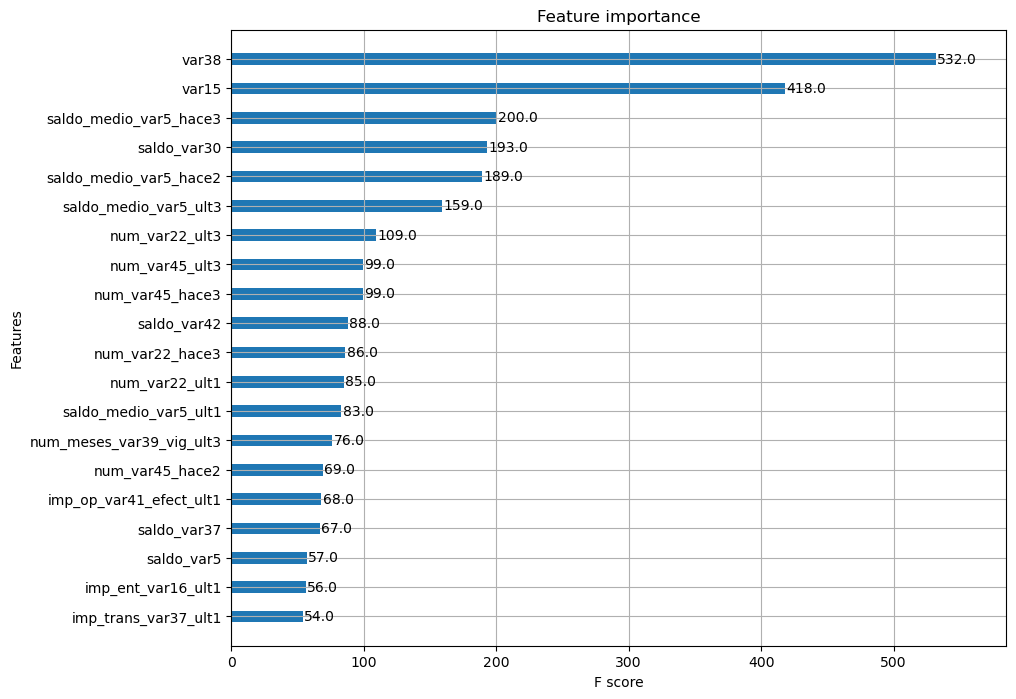

In [18]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

## lightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [21]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr,  eval_metric="auc", eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Info] Number of positive: 1658, number of negative: 40913
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13308
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 242
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038947 -> initscore=-3.205836
[LightGBM] [Info] Start training from score -3.205836
ROC AUC: 0.8134


In [22]:
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }

In [25]:
def objective_func(search_space):
    lgbm_clf =  LGBMClassifier(n_estimators=100, num_leaves=int(search_space['num_leaves']),
                               max_depth=int(search_space['max_depth']),
                               min_child_samples=int(search_space['min_child_samples']), 
                               subsample=search_space['subsample'],
                               learning_rate=search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        lgbm_clf.fit(X_tr, y_tr, eval_metric="auc",
           eval_set=[(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음.
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1]) 
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1*np.mean(roc_auc_list)

In [26]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출. 
best = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[LightGBM] [Info] Number of positive: 1579, number of negative: 38965                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030570 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12827                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038945 -> initscore=-3.205872                                        
[LightGBM] [Info] Start training from score -3.205872                                                                  
[LightGBM] [Info] Number of positive: 1609, number of negative: 38935                                                  
[LightGBM] [Info] Auto-choosing row-wi

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038945 -> initscore=-3.205872                                        
[LightGBM] [Info] Start training from score -3.205872                                                                  
[LightGBM] [Info] Number of positive: 1609, number of negative: 38935                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037565 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13046                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 202                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039685 -> initscore=-3.186281                                        
[LightGBM] [Info] Start training from 

[LightGBM] [Info] Total Bins 12946                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039685 -> initscore=-3.186281                                        
[LightGBM] [Info] Start training from score -3.186281                                                                  
[LightGBM] [Info] Number of positive: 1560, number of negative: 38984                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032901 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12855                                                                                     
[LightGBM] [Info] Number of data point

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029716 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12855                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038477 -> initscore=-3.218465                                        
[LightGBM] [Info] Start training from score -3.218465                                                                  
[LightGBM] [Info] Number of positive: 1579, number of negative: 38965                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034380 seconds.                
You can set `force_row_wise=true` to r

[LightGBM] [Info] Start training from score -3.218465                                                                  
[LightGBM] [Info] Number of positive: 1579, number of negative: 38965                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035357 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12895                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 199                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038945 -> initscore=-3.205872                                        
[LightGBM] [Info] Start training from score -3.205872                                                                  
[LightGBM] [Info] Number of positive: 

[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 195                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038945 -> initscore=-3.205872                                        
[LightGBM] [Info] Start training from score -3.205872                                                                  
[LightGBM] [Info] Number of positive: 1609, number of negative: 38935                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032282 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13008                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 197                          
[LightGBM] [Info] [binary:BoostFromSco

[LightGBM] [Info] Total Bins 13008                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 197                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039685 -> initscore=-3.186281                                        
[LightGBM] [Info] Start training from score -3.186281                                                                  
[LightGBM] [Info] Number of positive: 1560, number of negative: 38984                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030905 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12855                                                                                     
[LightGBM] [Info] Number of data point

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027907 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12855                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038477 -> initscore=-3.218465                                        
[LightGBM] [Info] Start training from score -3.218465                                                                  
[LightGBM] [Info] Number of positive: 1579, number of negative: 38965                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031202 seconds.                
You can set `force_row_wise=true` to r

[LightGBM] [Info] Start training from score -3.218465                                                                  
[LightGBM] [Info] Number of positive: 1579, number of negative: 38965                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030149 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12827                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038945 -> initscore=-3.205872                                        
[LightGBM] [Info] Start training from score -3.205872                                                                  
[LightGBM] [Info] Number of positive: 

[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038945 -> initscore=-3.205872                                        
[LightGBM] [Info] Start training from score -3.205872                                                                  
[LightGBM] [Info] Number of positive: 1609, number of negative: 38935                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030933 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13008                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 197                          
[LightGBM] [Info] [binary:BoostFromSco

[LightGBM] [Info] Total Bins 13094                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 205                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039685 -> initscore=-3.186281                                        
[LightGBM] [Info] Start training from score -3.186281                                                                  
[LightGBM] [Info] Number of positive: 1560, number of negative: 38984                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030042 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12950                                                                                     
[LightGBM] [Info] Number of data point

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033528 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12855                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038477 -> initscore=-3.218465                                        
[LightGBM] [Info] Start training from score -3.218465                                                                  
[LightGBM] [Info] Number of positive: 1579, number of negative: 38965                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038859 seconds.                
You can set `force_row_wise=true` to r

[LightGBM] [Info] Start training from score -3.218465                                                                  
[LightGBM] [Info] Number of positive: 1579, number of negative: 38965                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030204 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12827                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038945 -> initscore=-3.205872                                        
[LightGBM] [Info] Start training from score -3.205872                                                                  
[LightGBM] [Info] Number of positive: 

[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038945 -> initscore=-3.205872                                        
[LightGBM] [Info] Start training from score -3.205872                                                                  
[LightGBM] [Info] Number of positive: 1609, number of negative: 38935                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028495 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12954                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 195                          
[LightGBM] [Info] [binary:BoostFromSco

[LightGBM] [Info] Total Bins 12946                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039685 -> initscore=-3.186281                                        
[LightGBM] [Info] Start training from score -3.186281                                                                  
[LightGBM] [Info] Number of positive: 1560, number of negative: 38984                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031920 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12855                                                                                     
[LightGBM] [Info] Number of data point

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036092 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12855                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038477 -> initscore=-3.218465                                        
[LightGBM] [Info] Start training from score -3.218465                                                                  
[LightGBM] [Info] Number of positive: 1579, number of negative: 38965                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027483 seconds.                
You can set `force_row_wise=true` to r

In [28]:
lgbm_clf =  LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                           max_depth=int(best['max_depth']),
                           min_child_samples=int(best['min_child_samples']), 
                           subsample=round(best['subsample'], 5),
                           learning_rate=round(best['learning_rate'], 5)
                          )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
lgbm_clf.fit(X_tr, y_tr,
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Info] Number of positive: 1658, number of negative: 40913
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12898
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 192
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038947 -> initscore=-3.205836
[LightGBM] [Info] Start training from score -3.205836
ROC AUC: 0.8347
